<a href="https://colab.research.google.com/github/smillan-42/TFG/blob/main/TFG_SandraMillan_solucion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tfg: Optimización de carteras de Inversión con Algoritmo Genético

**Autora:** Sandra Millán

**Tutor:** Javier Sánchez Soriano

*Notebook de evaluación de modelos*

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

!pip install deap
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scoop

import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import struct

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms
import random


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78111 sha256=424dad80b62b76ae4c7eaec1206785b59f68e600db08362bcbe03faef411c2ea
  Stored in directory: /root/.cache/pip/wheels/0e/f1/1b/3ad62c1ce3f168b28392f8fd3adb19593de9167f54e426798f
Successfully built scoop


## **Descargar datos del IBEX 35**
1. Obtener datos de las 35 empresas
2. Entender los datos: cuando empezaron a cotizar en bolsa, cuando fueron introducidas en el índice y su valor
3. Descragar la base de datos con el valor 'Close'

In [ ]:
# Librería para obtener los datos: yahoo finance
!pip install yfinance

In [ ]:
# Librerías
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

**Empresas que empezaron a cotizar en bolsa**

Cotizar en Bolsa implica que un activo financiero esté admitido a negociación en un mercado bursátil, es decir, que los inversores puedan negociar con él.

Periodo de fecha obtenido será del 2017 no se tendrán en cuenta ni Melía Hoteles, ni Puig, ni Acciona Energía. Porque no tendriamos tiempo sufiencite como pare calcular la rentabilidad y el riesgo de una forma adecuada. Además, Melía ya no forma parte del IBEX 35. Acciona Energía será representada también por Acciona y Puig es demasiada nueva pro lo que no podremos tener datos de caldiad. Falta el día 2018-09-20 se ha resuelto con medias moviles de ventana 3 (más adelante)

| Nº | Empresa                        | Ticker | Año IBEX 35 | Cotiza desde |
|----|--------------------------------|-------------|-------------|---------------|
| 1  | Acciona                        | ANA    | 2015        | 1997          |
| 2  | Acciona Energía                | ANE    | 2022        | 2021          |
| 3  | Acerinox                       | ACX    | 2015        | 1986          |
| 4  | ACS                            | ACS    | 1998        | 1997          |
| 5  | Aena                           | AENA   | 2015        | 2015          |
| 6  | Amadeus IT Group               | AMS    | 2011        | 2010          |
| 7  | ArcelorMittal                  | MTS    | 2009        | 2006          |
| 8  | Banco Sabadell                 | SAB    | 2004        | 2001          |
| 9  | Bankinter                      | BKT    | 1992        | 1972          |
| 10 | BBVA                           | BBVA   | 1992        | 2000          |
| 11 | CaixaBank                      | CABK   | 2009        | 2007         |
| 12 | Cellnex Telecom                | CLNX   | 2016        | 2015          |
| 13 | Enagás                         | ENG    | 2003        | 2002          |
| 14 | Endesa                         | ELE    | 1992        | 1949          |
| 15 | Ferrovial                      | FER    | 1999        | 1999          |
| 16 | Fluidra                        | FDR    | 2021        | 2007          |
| 17 | Grifols                        | GRF    | 2008        | 2006          |
| 18 | IAG                            | IAG    | 2011        | 2011          |
| 19 | Iberdrola                      | IBE    | 1992        | 1992          |
| 20 | Inditex                        | ITX    | 2001        | 2001          |
| 21 | Indra Sistemas                 | IDR    | 1999        | 1999          |
| 22 | Inmobiliaria Colonial          | COL    | 2007        | 2000          |
| 23 | Logista                        | LOG    | 2022        | 2014          |
| 24 | Mapfre                         | MAP    | 1992        | 1986          |
| xxx | Meliá Hotels International     | MEL    | 2016        | 1996          |
| 25 | Puig Brands S.A     | PUIG.MC    | 2024        | 2024          |
| 26 | Merlin Properties              | MRL    | 2015        | 2014          |
| 27 | Naturgy                        | NTGY   | 2018        | 1999          |
| 28 | Redeia (Red Eléctrica)         | RED    | 2000        | 2000          |
| 29 | Repsol                         | REP    | 1992        | 1989          |
| 30 | Laboratorios Rovi              | ROVI   | 2021        | 2007          |
| 31 | Sacyr                          | SCYR   | 2022        | 2000          |
| 32 | Santander                      | SAN    | 1992        | 1988          |
| 33 | Solaria Energía                | SLR    | 2020        | 2007          |
| 34 | Telefónica                     | TEF    | 1992        | 1961          |
| 35 | Unicaja Banco                  | UNI    | 2022        | 2017          |

**Descargar los datos**

Nos interesa especialmente la matriz_close

In [ ]:
# Diccionario de nombres y tickers de Yahoo Finance
empresas_ibex35 = {
    'IBEX35' : '^IBEX',
    'Acciona': 'ANA.MC',
    'Acciona Energía': 'ANE.MC',
    'Acerinox': 'ACX.MC',
    'ACS': 'ACS.MC',
    'Aena': 'AENA.MC',
    'Amadeus IT Group': 'AMS.MC',
    'ArcelorMittal': 'MTS.MC',
    'Banco Sabadell': 'SAB.MC',
    'Bankinter': 'BKT.MC',
    'BBVA': 'BBVA.MC',
    'CaixaBank': 'CABK.MC',
    'Cellnex Telecom': 'CLNX.MC',
    'Enagás': 'ENG.MC',
    'Endesa': 'ELE.MC',
    'Ferrovial': 'FER.MC',
    'Fluidra': 'FDR.MC',
    'Grifols': 'GRF.MC',
    'IAG (International Airlines Group)': 'IAG.MC',
    'Iberdrola': 'IBE.MC',
    'Inditex': 'ITX.MC',
    'Indra Sistemas': 'IDR.MC',
    'Inmobiliaria Colonial': 'COL.MC',
    'Logista': 'LOG.MC',
    'Mapfre': 'MAP.MC',
    'Merlin Properties': 'MRL.MC',
    'Naturgy': 'NTGY.MC',
    'Redeia (antigua Red Eléctrica)': 'RED.MC',
    'Repsol': 'REP.MC',
    'Laboratorios Rovi': 'ROVI.MC',
    'Sacyr': 'SCYR.MC',
    'Santander': 'SAN.MC',
    'Solaria Energía': 'SLR.MC',
    'Telefónica': 'TEF.MC',
    'Unicaja Banco': 'UNI.MC'
}

# Fechas de interés
start_date = "2017-07-01"
end_date = "2025-04-26"

# Diccionario para almacenar las matrices
matrices = {
    'Close': pd.DataFrame(),
    'High': pd.DataFrame(),
    'Low': pd.DataFrame(),
    'Open': pd.DataFrame(),
    'Volume': pd.DataFrame()
}

# Descarga y construcción de matrices
for nombre, ticker in empresas_ibex35.items():
    print(f"Descargando datos de {nombre} ({ticker})...")
    try:
        data = yf.download(ticker, start=start_date, end=end_date)[['Close', 'High', 'Low', 'Open', 'Volume']]
        for tipo in matrices:
            matrices[tipo][nombre] = data[tipo]
    except Exception as e:
        print(f"Error con {nombre}: {e}")

# Guardar las matrices en archivos CSV (opcional)
for tipo, df in matrices.items():
    df.to_csv(f"matriz_{tipo.lower()}.csv")
    print(f"Guardado matriz_{tipo.lower()}.csv")

print("Todo completado.")

Descargando datos de IBEX35 (^IBEX)...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Descargando datos de Acciona (ANA.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Acciona Energía (ANE.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Acerinox (ACX.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de ACS (ACS.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Aena (AENA.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Amadeus IT Group (AMS.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de ArcelorMittal (MTS.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Banco Sabadell (SAB.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Bankinter (BKT.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de BBVA (BBVA.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de CaixaBank (CABK.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Cellnex Telecom (CLNX.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Enagás (ENG.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Endesa (ELE.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Ferrovial (FER.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Fluidra (FDR.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Grifols (GRF.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de IAG (International Airlines Group) (IAG.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Iberdrola (IBE.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Inditex (ITX.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Indra Sistemas (IDR.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Inmobiliaria Colonial (COL.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Logista (LOG.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Mapfre (MAP.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Merlin Properties (MRL.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Naturgy (NTGY.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Redeia (antigua Red Eléctrica) (RED.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Repsol (REP.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Laboratorios Rovi (ROVI.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Sacyr (SCYR.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Santander (SAN.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Solaria Energía (SLR.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Telefónica (TEF.MC)...


[*********************100%***********************]  1 of 1 completed


Descargando datos de Unicaja Banco (UNI.MC)...


[*********************100%***********************]  1 of 1 completed


Guardado matriz_close.csv
Guardado matriz_high.csv
Guardado matriz_low.csv
Guardado matriz_open.csv
Guardado matriz_volume.csv
Todo completado.


## **Cargar datos**

1. Completar el dataset con las acciones a estudiar
2. Completar los datos NaN
2. Dividir el dataset en Train y Test
4. Visualizar los datos del IBEX 35

In [6]:
matriz_close = pd.read_csv("matriz_close.csv", index_col=0)
print(f"Archivo matriz_close.csv cargado correctamente.\n{matriz_close.head()}")

# Fijamos la semilla. Si no cambiamos la semilla,
# la función generará los mismos número aleatorios
random.seed(0)

Archivo matriz_close.csv cargado correctamente.
                  IBEX35    Acciona  Acciona Energía  Acerinox        ACS  \
Date                                                                        
2017-07-03  10604.200195  61.182335              NaN  7.701546  21.467010   
2017-07-04  10566.700195  60.148037              NaN  7.780067  21.298668   
2017-07-05  10523.599609  60.203732              NaN  7.763708  21.423365   
2017-07-06  10498.400391  58.811420              NaN  7.688457  20.918339   
2017-07-07  10488.799805  59.917309              NaN  7.655742  21.061737   

                  Aena  Amadeus IT Group  ArcelorMittal  Banco Sabadell  \
Date                                                                      
2017-07-03  132.124786         48.371433      18.989607        1.277088   
2017-07-04  130.874649         48.306892      19.118759        1.275698   
2017-07-05  130.523041         48.601955      18.883520        1.268055   
2017-07-06  128.686890         48.371

### Fecha mínima del Dataset

**Mínima fecha valida**

Tenemos datos desde el 2017-07-03

In [7]:
fecha_minima_por_columna = matriz_close.apply(lambda col: col.first_valid_index())
print(fecha_minima_por_columna)
print(fecha_minima_por_columna.shape[0])

IBEX35                                2017-07-03
Acciona                               2017-07-03
Acciona Energía                       2021-07-02
Acerinox                              2017-07-03
ACS                                   2017-07-03
Aena                                  2017-07-03
Amadeus IT Group                      2017-07-03
ArcelorMittal                         2017-07-03
Banco Sabadell                        2017-07-03
Bankinter                             2017-07-03
BBVA                                  2017-07-03
CaixaBank                             2017-07-03
Cellnex Telecom                       2017-07-03
Enagás                                2017-07-03
Endesa                                2017-07-03
Ferrovial                             2017-07-03
Fluidra                               2017-07-03
Grifols                               2017-07-03
IAG (International Airlines Group)    2017-07-03
Iberdrola                             2017-07-03
Inditex             

Voy a seleccionar las fechas del 2017 al 2025, entiendiendo qeu perdemos Acciona Energía, pero no pasa nada porque al final está representad por Acciona.

**Eliminar las empresas**

Eliminar IBEX35 y Acciona Energía

In [8]:
matriz_close = matriz_close.drop(columns="IBEX35")
matriz_close = matriz_close.drop(columns="Acciona Energía")

### Datos NaN

**¿Cuántos NaN hay?**

In [9]:
nan_counts = matriz_close.isnull().sum()
nan_counts

,0
Acciona,1
Acerinox,1
ACS,1
Aena,1
Amadeus IT Group,1
ArcelorMittal,1
Banco Sabadell,1
Bankinter,1
BBVA,1
CaixaBank,1


**Medias Móviles para rellenar NaN**

In [10]:
# 1. Crear la media móvil
media_movil = matriz_close.rolling(window=3, min_periods=1).mean()

# 2. Localizar solo el día que falta (por ejemplo, '2018-09-20') y rellenarlo
fecha_faltante = '2018-09-20'

# Para todas las columnas:
for columna in matriz_close.columns:
    if pd.isna(matriz_close.loc[fecha_faltante, columna]):
        matriz_close.loc[fecha_faltante, columna] = media_movil.loc[fecha_faltante, columna]

### Dividir el Dataset

Los datos de validación se utilizaron en este informe para ajustar hiperparámetros.

https://colab.research.google.com/drive/1Cp8-qBakbyEfBwTyC4Smg2y2v_YFfhQP?usp=sharing

**Dividir el dataset en Train y Test**

El periodo seleccionado para el análisis comprendió desde el 1 de julio de 2017 hasta el 26 de abril de 2025. La fecha de inicio se estableció como la primera en la que todas las 33 empresas consideradas (excluyendo aquellas descartadas por falta de datos) presentaban información completa, sin valores ausentes. La última incorporación relevante al índice, dentro del conjunto finalmente estudiado, fue Unicaja Banco, cuya cotización en la Bolsa de Madrid comenzó en 2017, permitiendo así su inclusión desde el comienzo del periodo analizado.

1. Entrenamiento: del 1 de julio de 2017 al 1 de julio de 2022.
2. Validación: del 2 de julio de 2022 al 26 de abril de 2023.
2. Evoluación: del 2 de julio de 2023 al 26 de abril de 2025.

Esta división temporal permitió analizar el comportamiento de los activos bajo distintos regímenes de mercado, así como evaluar la estabilidad del modelo a largo plazo.


In [39]:
# del 17 al 22 ~ entrenamiento
matriz_close_2017_2022 = matriz_close[:'2022-07-01']
returns_data_22 = matriz_close_2017_2022.pct_change().dropna()  # Retornos porcentuales simples - 2017 - 2022
mean_returns_22 = returns_data_22.mean()

# del 22 al 23 ~ validación
matriz_close_2022_2023 = matriz_close['2022-07-02':'2023-07-01']
returns_data_23 = matriz_close_2022_2023.pct_change().dropna()  # Retornos porcentuales simples - 2022 - 2023
mean_returns_23 = returns_data_23.mean()

# del 23 al 25 ~ evaluación
matriz_close_2023_2025 = matriz_close['2023-07-02':]
returns_data_25 = matriz_close_2023_2025.pct_change().dropna()  # Retornos porcentuales simples - 2023 - 2025
mean_returns_25 = returns_data_25.mean()

### Datos del IBEX35

**Gráfica de líneas: precio diario**

Evolución del precio de cierre diario de una empresa representativa (Acciona), evidenciando la tendencia general del mercado y la volatilidad asociada. Podemos observar como el sistema tiende a ir aumentando el precio de las acciones, aunque podemos observar cómo en periodos en crisis (pandemia del Covid-19) el precio se ve afectado.

In [13]:
def graficar_linea(serie_cierre, titulo="Evolución del IBEX 35"):
    # Configurar el estilo de gráficos
    sns.set_theme(style="whitegrid")

    # Crear la figura
    plt.figure(figsize=(12, 6))
    plt.plot(serie_cierre.index, serie_cierre.values, label="Cierre diario", color="blue")
    plt.title(titulo)
    plt.xlabel("Año")
    plt.ylabel("Precio de cierre (€)")
    plt.legend()

    # Mostrar solo los años en el eje X
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Mejorar presentación
    plt.tight_layout()
    plt.show()

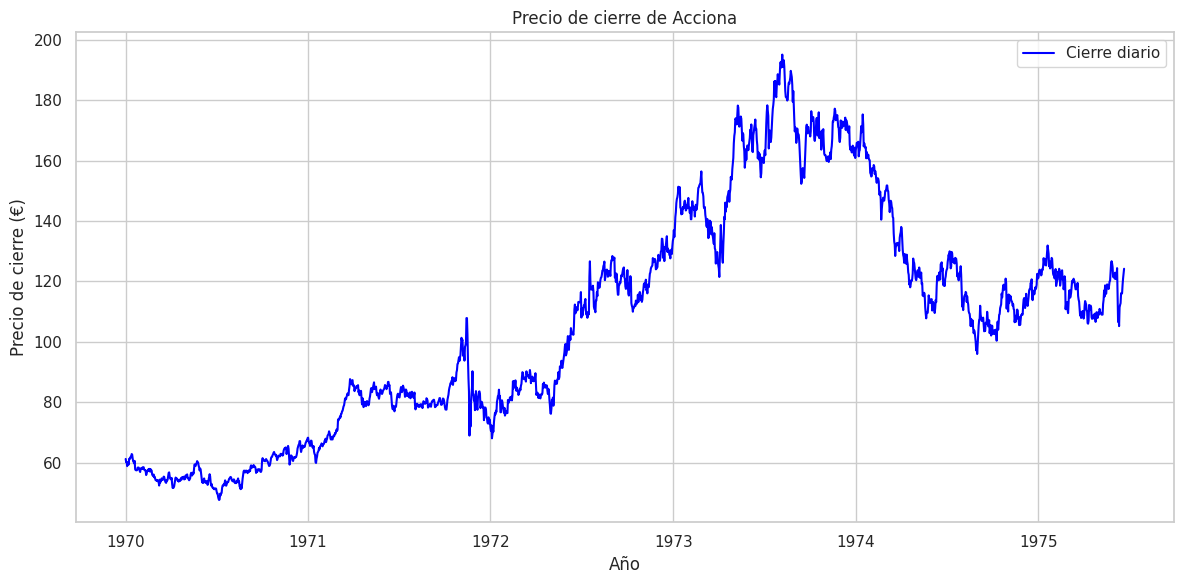

In [14]:
graficar_linea(matriz_close['Acciona'], titulo="Precio de cierre de Acciona")

**Medias de los retornos diarios**

Las medias de los retornos diarios para todas las empresas, diferenciando entre el periodo de entrenamiento y de test. Esta gráfica de barras permite visualizar qué activos generaron mayor rentabilidad media en cada fase. Como podemos observar la empresa que mayor retorno tiene en el periodo de Train es Bankinter que baja posiciones en el periodo de Test y Acciona siendo la tercera, en el periodo de Test obtiene rendimiento negativo. Por lo que, se evidencia la necesidad de realizar un periodo de evaluación para el algoritmo genético.

In [15]:
def graficar_retornos(matriz_close, title = "Media de retornos diarios"):
  # Calcular los retornos diarios
  returns_data = matriz_close.pct_change().dropna()  # Retornos porcentuales simples

  # Calcular las medias de los retornos diarios por empresa
  mean_returns = returns_data.mean()

  # Crear un diagrama de barras con las medias de los retornos diarios
  plt.figure(figsize=(10, 4))
  mean_returns.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title(title, y=1.05)
  plt.xlabel("Empresas")
  plt.ylabel("Media de Retorno")
  plt.xticks(rotation=45, ha="right")
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()  # Ajustar diseño
  plt.show()

In [ ]:
matriz_close_2017_2022 = matriz_close_2017_2022.rename(columns={'IAG (International Airlines Group)': 'IAG', 'Redeia (antigua Red Eléctrica)': 'Redeia'})
matriz_close_2022_2023 = matriz_close_2022_2023.rename(columns={'IAG (International Airlines Group)': 'IAG', 'Redeia (antigua Red Eléctrica)': 'Redeia'})
matriz_close_2023_2025 = matriz_close_2023_2025.rename(columns={'IAG (International Airlines Group)': 'IAG', 'Redeia (antigua Red Eléctrica)': 'Redeia'})

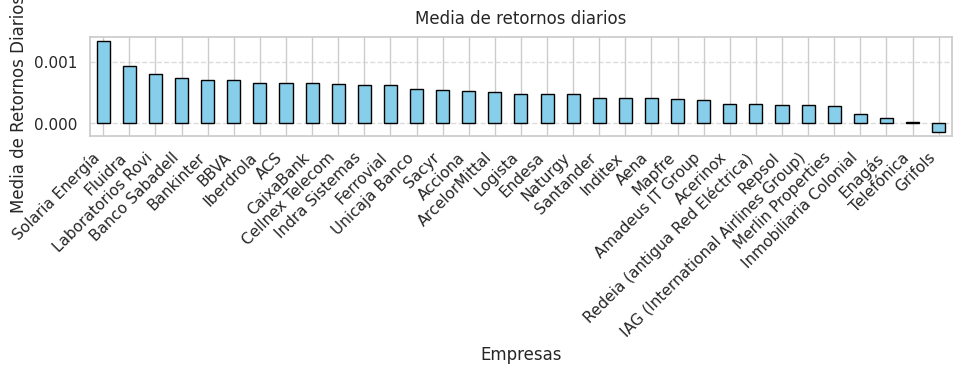

In [16]:
graficar_retornos(matriz_close, "Media de retornos diarios")

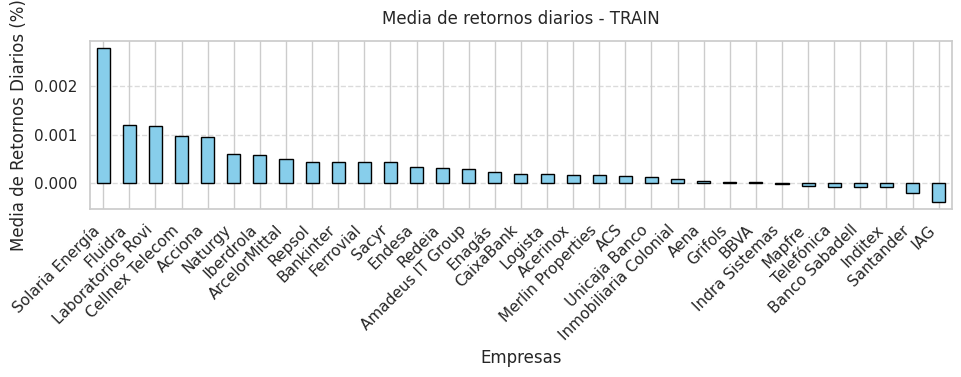

In [45]:
graficar_retornos(matriz_close_2017_2022, "Media de retornos diarios - TRAIN")

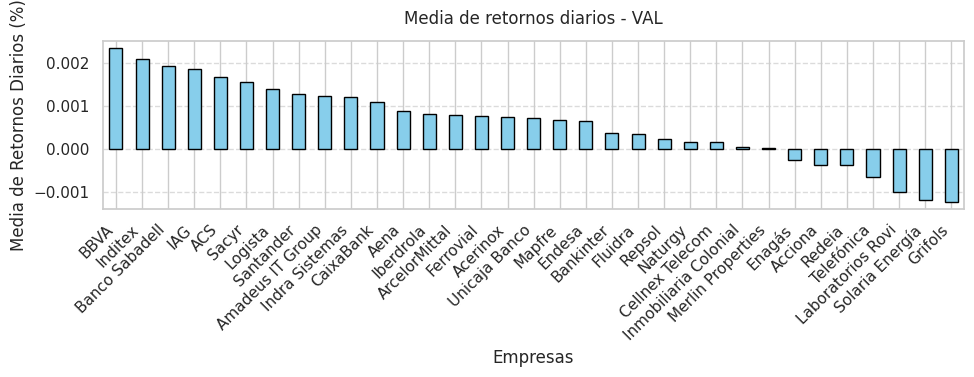

In [46]:
graficar_retornos(matriz_close_2022_2023, "Media de retornos diarios - VAL")

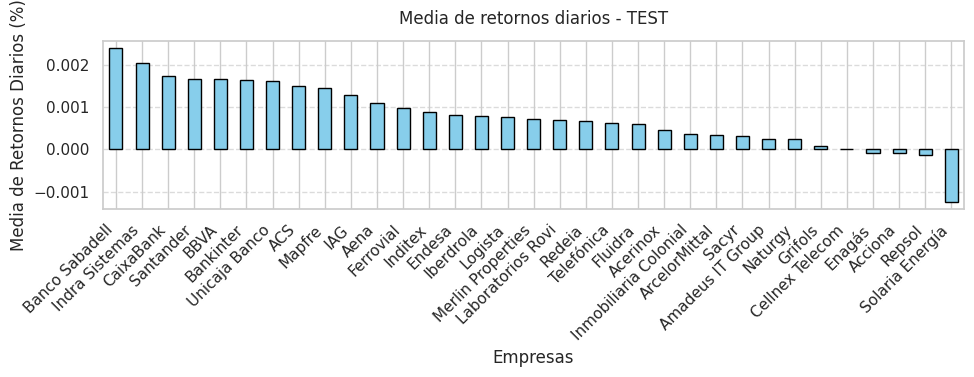

In [47]:
graficar_retornos(matriz_close_2023_2025, "Media de retornos diarios - TEST")

**Matriz de covarianza entre los retornos diarios de las empresas**

Matriz de covarianza entre los retornos diarios de las empresas. De este análisis se desprenden patrones de comportamiento conjunto, como la alta correlación entre los bancos (BBVA, Santander, CaixaBank y Bankinter), el agrupamiento de compañías energéticas (Solaria, Acciona, Iberdrola), así como ciertos clústeres industriales e inmobiliarios (Merlin Properties, Inmobiliaria Colonial, ArcelorMittal, Acerinox, Fluidra).

In [20]:
def graficar_top_10_cov(retorno, title = "Matriz de Covarianza de los Retornos Diarios (IBEX 35)"):
  # 1. Calcular la matriz de covarianza
  covariance_matrix = retorno.cov()

  # 2. "Desenrollar" la matriz para encontrar los pares
  covariance_unstacked = covariance_matrix.unstack()

  # 3. Eliminar duplicados (A-B y B-A son lo mismo) y quitar la diagonal
  covariance_unstacked = covariance_unstacked[covariance_unstacked.index.get_level_values(0) != covariance_unstacked.index.get_level_values(1)]
  covariance_unstacked = covariance_unstacked.drop_duplicates()

  # 4. Obtener los 15 pares con mayor covarianza
  top_10_pairs = covariance_unstacked.sort_values(ascending=False).head(35)

  # 5. Obtener las empresas involucradas en esos 15 pares
  empresas_top = list(set([i for pair in top_10_pairs.index for i in pair]))

  # 6. Filtrar la matriz de covarianza original para esas empresas
  filtered_covariance = covariance_matrix.loc[empresas_top, empresas_top]

  # 7. Dibujar la matriz agrupada (clustermap)
  sns.clustermap(filtered_covariance, cmap="Reds", annot=False, fmt=".7f",
                cbar_kws={'label': 'Covarianza'}, figsize=(12, 10),
                xticklabels=True, yticklabels=True)

  plt.suptitle(title, y=1.05)
  plt.show()

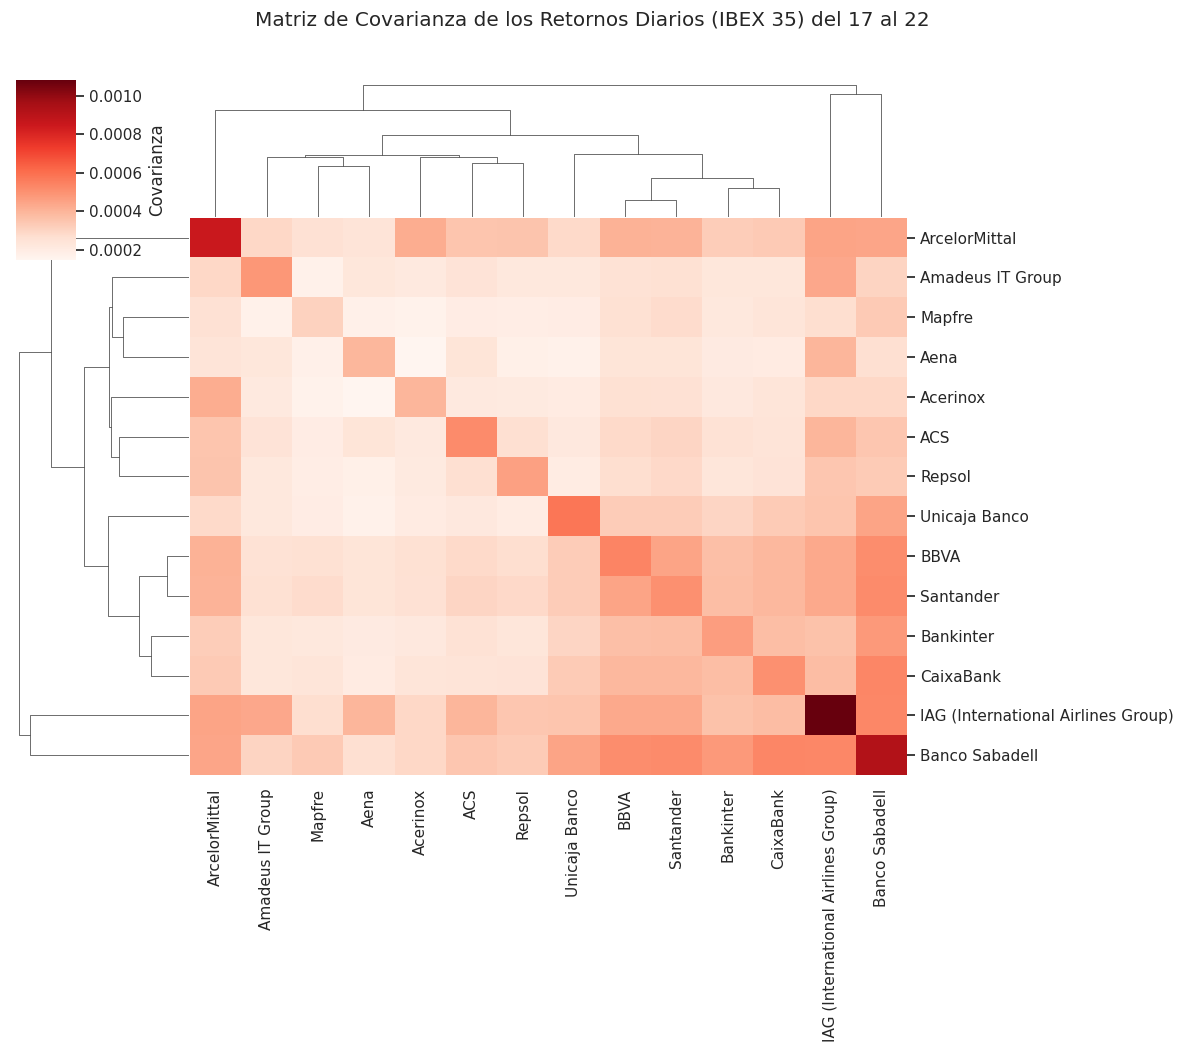

In [21]:
graficar_top_10_cov(returns_data_22, "Matriz de Covarianza de los Retornos Diarios (IBEX 35) del 17 al 22")

## **Estimaciones de métricas buenas**

Medidas de una buena cartera:

1. Media retorno - Rentabilidad esperada - MAX
2. Covarianza retorno - Volatilidad (mide el riesgo) - MIN
3. Asimetría - Sesgo (mide qué tan inclinada está la distribución.) - MAX ~ POSITIVO +
4. Curtosis - Riesgo extremo (mide qué tan "picuda" o "aplanada" es la distribución) - MIN

También, se incluyen todas las funciones que servirán para evaluar los modelos

### Train: datos del 2017 al 2022

In [22]:
# 1. Media (rentabilidad esperada)
mean_returns = returns_data_22.mean()

# 2. Matriz de covarianzas (varianza)
cov_matrix = returns_data_22.cov()

# 3. Asimetría de cada activo
skewness = returns_data_22.skew()

# 4. Curtosis de cada activo
kurt = returns_data_22.kurtosis()

In [23]:
# Periodo del 2017 - 2022

# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Asimetría (Skewness) +': skewness,
    'Curtosis (Kurtosis) min': kurt
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Asimetría (Skewness)': "{:.3f}",
    'Curtosis (Kurtosis)': "{:.3f}"
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Momentos Estadísticos de los Retornos 2017 - 2022")

# Mostrar
#tabla_momentos_bonita

#tabla_momentos
# Suponiendo que tu tabla está en un DataFrame llamado df

# 1. Convertir todo a string con separador decimal ","
df_str = tabla_momentos.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (float, int)) else x)

# 2. Mostrar
# Formatear la tabla
df_str_BONITA = df_str.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Asimetría (Skewness)': "{:.3f}",
    'Curtosis (Kurtosis)': "{:.3f}"
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Momentos Estadísticos de los Retornos 2017 - 2022")

df_str_BONITA

<ipython-input-23-8ca7d3244b39>:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_str = tabla_momentos.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (float, int)) else x)


,Rentabilidad Esperada (Media)max,Varianza min,Asimetría (Skewness) +,Curtosis (Kurtosis) min
Acciona,"0,0009470704361645702","0,00036413005632776276","-0,31920228313851884","11,371774378389908"
Acerinox,"0,00017461691846303783","0,00039463535623162276","-0,33208016258907735","4,0234809883332865"
ACS,"0,0001519823135288273","0,0005183478606303315","0,8510067217023355","23,063273154463754"
Aena,"5,216685001028758e-05","0,0003914870199111234","-0,26354193794775777","22,315830417289302"
Amadeus IT Group,"0,00028210678750164084","0,00048418333814791755","0,32341332778041976","8,49548226737877"
ArcelorMittal,"0,0004964632843536933","0,0008525641212528584","-0,09538589114148859","5,070569001541504"
Banco Sabadell,"-8,46540075344048e-05","0,000921047297813039","0,35021953679384454","7,686172818469458"
Bankinter,"0,0004351474184786032","0,00046570944004312425","0,33355307628725844","10,616753801399655"
BBVA,"1,7037326067030055e-05","0,0005371693923342597","0,14157686884467033","7,8526286750641106"
CaixaBank,"0,00018720840388660023","0,0005030740146519603","0,19638683599414136","5,071959549730705"


### Validation: datos del 2022 al 2023

In [24]:
# 1. Media (rentabilidad esperada)
mean_returns2 = returns_data_23.mean()

# 2. Matriz de covarianzas (varianza)
cov_matrix2 = returns_data_23.cov()

# 3. Asimetría de cada activo
skewness2 = returns_data_23.skew()

# 4. Curtosis de cada activo
kurt2 = returns_data_23.kurtosis()

In [25]:
# Periodo del 2022 - 2025

# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns2,
    'Varianza min': np.diag(cov_matrix2),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Asimetría (Skewness) +': skewness2,
    'Curtosis (Kurtosis) min': kurt2
})

# 1. Convertir todo a string con separador decimal ","
tabla_momentos = tabla_momentos.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (float, int)) else x)

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Asimetría (Skewness)': "{:.3f}",
    'Curtosis (Kurtosis)': "{:.3f}"
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Momentos Estadísticos de los Retornos 2022 - 2025")

# Mostrar
tabla_momentos_bonita

<ipython-input-25-abe8817e5766>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_momentos = tabla_momentos.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (float, int)) else x)


,Rentabilidad Esperada (Media)max,Varianza min,Asimetría (Skewness) +,Curtosis (Kurtosis) min
Acciona,"-0,00036734767018371746","0,0002450798615122184","-0,38469411281415067","0,8513438905819761"
Acerinox,"0,0007308330932512018","0,0003069021999230584","-0,15865360988782354","1,052520126072023"
ACS,"0,0016802507883284727","0,00014132927192579125","-0,17638945525726907","0,7423173885677117"
Aena,"0,0008888079715294986","0,00022053806472029552","-0,42333484538276916","0,630466708577202"
Amadeus IT Group,"0,001243445954249004","0,0002555526776422659","0,119073371796445","1,2520738831613873"
ArcelorMittal,"0,0007813558355789913","0,0004496219731362256","-0,35990289455809743","1,2762780154533382"
Banco Sabadell,"0,0019226163212306328","0,0006872646715161967","-0,5022410531440635","3,547440232843528"
Bankinter,"0,00036390625907824567","0,00044819268319390735","-0,5400333022431086","2,0029651861255355"
BBVA,"0,0023424891569924313","0,00037647447050417594","-0,7089766935754009","3,649071693141353"
CaixaBank,"0,001087915756945535","0,0004679686836503375","-0,25394500800713865","2,3286807657724125"


### Test: datos del 2023 al 2025

In [26]:
# 1. Media (rentabilidad esperada)
mean_returns2 = returns_data_25.mean()

# 2. Matriz de covarianzas (varianza)
cov_matrix2 = returns_data_25.cov()

# 3. Asimetría de cada activo
skewness2 = returns_data_25.skew()

# 4. Curtosis de cada activo
kurt2 = returns_data_25.kurtosis()

In [27]:
# Periodo del 2022 - 2025

# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns2,
    'Varianza min': np.diag(cov_matrix2),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Asimetría (Skewness) +': skewness2,
    'Curtosis (Kurtosis) min': kurt2
})

# 1. Convertir todo a string con separador decimal ","
tabla_momentos = tabla_momentos.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (float, int)) else x)

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Asimetría (Skewness)': "{:.3f}",
    'Curtosis (Kurtosis)': "{:.3f}"
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Momentos Estadísticos de los Retornos 2022 - 2025")

# Mostrar
tabla_momentos_bonita

<ipython-input-27-abe8817e5766>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_momentos = tabla_momentos.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (float, int)) else x)


,Rentabilidad Esperada (Media)max,Varianza min,Asimetría (Skewness) +,Curtosis (Kurtosis) min
Acciona,"-0,00010117009515467232","0,00035614653156553194","-0,4621910443005412","1,6330062921720736"
Acerinox,"0,0004496347963656313","0,00024126294023704272","-0,6393861376965619","5,340280107013758"
ACS,"0,001489301160267348","0,00018381938308011786","-0,8503068294393628","10,164168881601121"
Aena,"0,0011024232800253822","0,00014149713889612497","-0,3521152222257634","3,542699875847751"
Amadeus IT Group,"0,000247926398711228","0,00020101605354047478","-0,5687096239515741","3,9185630199512027"
ArcelorMittal,"0,000338361167174778","0,0004042659487130853","0,6767158177896989","6,471580645008725"
Banco Sabadell,"0,002380709777305592","0,00037691213792090394","-0,5097213216010512","3,7754545227109007"
Bankinter,"0,0016284857657070597","0,00026457311514696525","-0,4214583954763299","4,116599431692499"
BBVA,"0,0016460899121679465","0,0003093862715501366","-0,5439514659772406","3,4904939321200295"
CaixaBank,"0,0017200435015486178","0,00028528326670050847","-0,7675209669977903","4,080812631067358"


### Calculo de métricas evaluación
1. Rentabilidad Media Diaria
2. Volatilidad Diaria
3. Semivarianza Diaria
4. Rentabilidad Acumulada
5. Drawdown
6. CVar

In [28]:
# Mostrar los resultados
def calcular_max_drawdown(serie_acumulada):
    pico_acumulado = serie_acumulada.cummax()
    drawdown = (serie_acumulada - pico_acumulado) / pico_acumulado
    return drawdown.min()  # valor más negativo = peor caída

In [29]:
def resultados_test(returns_data, pesos1, i):
  # 1. Preparar pesos
  if np.sum(pesos1) != 1:
    pesos1 = np.array(pesos1)
    pesos1 /= np.sum(pesos1)  # Normalizar para asegurarnos que suman 1

  # 2. Retornos diarios de la cartera en el test
  retornos_cartera_test = np.dot(returns_data, pesos1)

  # 6. Drowdown
  rentabildiad_acumulada = (1 + retornos_cartera_test).cumprod()
  mdd = calcular_max_drawdown(pd.Series(rentabildiad_acumulada, index=returns_data.index))

  #7. Rentabildiad acumulada
  rentabildiad_acumulada1 = np.mean(rentabildiad_acumulada)

  # 3. Calcular métricas de la cartera sobre el test
  rentabilidad_media_test = np.mean(retornos_cartera_test)  # Media diaria
  volatilidad_test = np.std(retornos_cartera_test)           # Desviación estándar diaria
  semivarianza_test = np.mean((np.minimum(0, retornos_cartera_test))**2)  # Solo pérdidas
  # CVaR al 5%
  alpha = 0.05
  var_5 = np.percentile(retornos_cartera_test, 100 * alpha)
  cvar_5 = retornos_cartera_test[retornos_cartera_test <= var_5].mean()

  # 4. Crear el DataFrame de resultados
  resultados1 = pd.DataFrame({
      'Rentabilidad Media Diaria': [rentabilidad_media_test],
      'Volatilidad Diaria': [volatilidad_test],
      'Semivarianza Diaria': [semivarianza_test],
      'Rentabilidad Acumulada': [rentabildiad_acumulada1],
      'Drawdown': [mdd],
      'CVaR 5% Diario': [cvar_5]
  })

  # 5. Formatear la tabla bonita
  resultados1_formateado = resultados1.style.format({
      'Rentabilidad Media Diaria': "{:.5f}",
      'Volatilidad Diaria': "{:.5f}",
      'Semivarianza Diaria': "{:.8f}",
      'Rentabilidad Acumulada': "{:.5f}",
      'Drawdown': "{:.5f}",
      'CVaR 5% Diario': "{:.5f}"
  }).set_table_styles(
      [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
  ).set_properties(**{
      'text-align': 'center'
  }).set_caption(f"Evaluación de la Cartera sobre Datos Test (2022-2025) {i}")

  # 6. Mostrar tabla bonita
  display(resultados1_formateado)

  return resultados1

In [30]:
def funcion_resultado_global(individuo):

    weights = funcion_pesos(individuo)

    # Calcular la rentabilidad esperada y la volatilidad
    rentabilidad_esperada = np.dot(mean_returns, weights)
    # OJO: ponerle un multiplicadro q para determianan el riesgo que se está dispuesto a asumir
    q = 0.5
    volatilidad = q * np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # volatilidad = np.sqrt(np.dot(weights.T, np.dot(retornos_mensuales.cov(), weights))) # Se peude mirar sin la raiz cuadrada

    return (rentabilidad_esperada / volatilidad), rentabilidad_esperada, volatilidad

### Frente de pareta

In [31]:
import matplotlib.pyplot as plt

def plot_pareto_2d(hof, pop=None, objetivo_x=1, objetivo_y=0, invertir_x=False, invertir_y=False):
    """
    Dibuja el frente de Pareto en 2D para dos objetivos.
    hof: lista del ParetoFront (mejores individuos)
    pop: población final (opcional, para comparar con hof)
    objetivo_x: índice del objetivo en eje X (por defecto: riesgo)
    objetivo_y: índice del objetivo en eje Y (por defecto: rendimiento)
    invertir_x: si True, se asume que es un objetivo a minimizar
    invertir_y: si True, se asume que es un objetivo a minimizar
    """

    # Extraer valores de fitness del hof
    hof_vals = [ind.fitness.values for ind in hof]
    x_hof = [v[objetivo_x] for v in hof_vals]
    y_hof = [v[objetivo_y] for v in hof_vals]

    # Población (opcional)
    plt.figure(figsize=(8, 6))
    if pop is not None:
        pop_vals = [ind.fitness.values for ind in pop]
        x_pop = [v[objetivo_x] for v in pop_vals]
        y_pop = [v[objetivo_y] for v in pop_vals]
        plt.scatter(x_pop, y_pop, color="dodgerblue", label="Población", alpha=0.6)

    # Etiquetas
    plt.xlabel("Riesgo (Volatilidad)")
    plt.ylabel("Rentabilidad Esperada")
    plt.title("Frente de Pareto - Población final")
    plt.grid(True)
    plt.legend()

    # Invertir ejes si se desea minimizar (por estética)
    if invertir_x:
        plt.gca().invert_xaxis()
    if invertir_y:
        plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

In [32]:
import matplotlib.pyplot as plt

def plot_poblacion_inicial(poblacion, funcion_objetivo, invertir_x=True, invertir_y=False):
    """
    Grafica la población inicial en un plano Riesgo vs Rentabilidad.

    - poblacion: lista de individuos
    - funcion_objetivo: función que devuelve (rentabilidad, riesgo)
    """
    rentabilidades = []
    riesgos = []

    for ind in poblacion:
        rendimiento, riesgo = funcion_objetivo(ind)
        # Evitamos valores inválidos que pusiste como penalización
        if rendimiento > -9999 and riesgo < 9999:
            rentabilidades.append(rendimiento)
            riesgos.append(riesgo)

    # Graficar
    plt.figure(figsize=(8, 6))
    plt.scatter(riesgos, rentabilidades, color="dodgerblue", alpha=0.7, label="Población Inicial")

    plt.xlabel("Riesgo (Volatilidad)")
    plt.ylabel("Rentabilidad Esperada")
    plt.title("Frente de pareto - Población Inicial")
    plt.grid(True)
    plt.legend()

    if invertir_x:
        plt.gca().invert_xaxis()
    if invertir_y:
        plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

### Convergencia de los Algoritmos Genéticos

In [33]:
def plot_evolucion(logs, titulos=None):
    if titulos is None:
        titulos = [''] * len(logs)

    fig, axs = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)

    if len(logs) == 1:
        axs = [axs]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")
        fit_maxs = log.select("max")
        fit_ave = log.select("avg")

        axs[i].plot(gen, fit_mins, label="Min", color="royalblue", linewidth=2)
        axs[i].plot(gen, fit_maxs, label="Max", color="tomato", linestyle="--", linewidth=2)
        axs[i].plot(gen, fit_ave, label="Avg", color="gray", linestyle=":", linewidth=2)

        axs[i].set_title(titulos[i], fontsize=12)
        axs[i].set_xlabel("Generación", fontsize=11)
        axs[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_maxs) - min(fit_mins)) * 0.05
        axs[i].set_ylim(min(fit_mins) - margen, max(fit_maxs) + margen)

        axs[i].legend(loc="best", fontsize=10)
        axs[i].grid(True)
        axs[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Convergencia_subplot.png", dpi=300, bbox_inches='tight')
    plt.show()

In [34]:
import matplotlib.pyplot as plt

def plot_evolucion_doble(logs, titulos=None):
    if titulos is None:
        titulos = [''] * len(logs)

    # === Gráfico 1: Mínimo ===
    fig_min, axs_min = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)
    if len(logs) == 1:
        axs_min = [axs_min]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")

        axs_min[i].plot(gen, fit_mins, label="Fitness Mínimo", color="royalblue", linewidth=2)
        axs_min[i].set_title(f"{titulos[i]} - Mínimo", fontsize=12)
        axs_min[i].set_xlabel("Generación", fontsize=11)
        axs_min[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_mins) - min(fit_mins)) * 0.05
        axs_min[i].set_ylim(min(fit_mins) - margen, max(fit_mins) + margen)

        axs_min[i].legend(loc="best", fontsize=10)
        axs_min[i].grid(True)
        axs_min[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Fitness_Minimo.png", dpi=300, bbox_inches='tight')
    plt.show()

    # === Gráfico 2: Media ===
    fig_avg, axs_avg = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)
    if len(logs) == 1:
        axs_avg = [axs_avg]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_ave = log.select("avg")

        axs_avg[i].plot(gen, fit_ave, label="Fitness Medio", color="darkorange", linestyle="--", linewidth=2)
        axs_avg[i].set_title(f"{titulos[i]} - Media", fontsize=12)
        axs_avg[i].set_xlabel("Generación", fontsize=11)
        axs_avg[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_ave) - min(fit_ave)) * 0.05
        axs_avg[i].set_ylim(min(fit_ave) - margen, max(fit_ave) + margen)

        axs_avg[i].legend(loc="best", fontsize=10)
        axs_avg[i].grid(True)
        axs_avg[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Fitness_Medio.png", dpi=300, bbox_inches='tight')
    plt.show()


In [35]:
def graficar_objetivos_por_generacion(logbook, nombres_objetivos):
    generaciones = logbook.select("gen")
    fitness_mins = np.array(logbook.select("min"))  # Cada fila: [retorno, vol, skew, kurt]
    fitness_maxs = np.array(logbook.select("max"))

    # Graficar mínimos por objetivo
    fig_min, axs_min = plt.subplots(1, len(nombres_objetivos), figsize=(5 * len(nombres_objetivos), 4), sharex=True)
    for i, nombre in enumerate(nombres_objetivos):
        axs_min[i].plot(generaciones, fitness_mins[:, i], label="Mínimo", color="royalblue")
        axs_min[i].set_title(f"{nombre} - Mínimo")
        axs_min[i].set_xlabel("Generación")
        axs_min[i].set_ylabel("Valor")
        axs_min[i].grid(True)
        axs_min[i].legend()

    plt.tight_layout()
    plt.show()

    # Graficar máximos por objetivo
    fig_max, axs_max = plt.subplots(1, len(nombres_objetivos), figsize=(5 * len(nombres_objetivos), 4), sharex=True)
    for i, nombre in enumerate(nombres_objetivos):
        axs_max[i].plot(generaciones, fitness_maxs[:, i], label="Máximo", color="darkorange")
        axs_max[i].set_title(f"{nombre} - Máximo")
        axs_max[i].set_xlabel("Generación")
        axs_max[i].set_ylabel("Valor")
        axs_max[i].grid(True)
        axs_max[i].legend()

    plt.tight_layout()
    plt.show()


## **División Naive**

Los pesos de las carteras srán iguales para todas las acciones

In [ ]:
matriz_close.shape[1]

33

In [ ]:
n_activos = matriz_close.shape[1]  # número de columnas = número de activos

# Asignación naive: todos los activos tienen el mismo peso
lista_pesos = [1 / n_activos] * n_activos

# Verificación: los pesos deben sumar 1
suma_pesos = sum(lista_pesos)
print(f"La suma de los pesos es: {suma_pesos:.6f}")

import numpy as np
pesos_array = np.array(lista_pesos)


La suma de los pesos es: 1.000000


In [ ]:
total = resultados_test(returns_data_25, pesos_array, 0)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00079,0.00902,0.00004195,1.16263,-0.12839,-0.02021


## **Algoritmo Genético Simple: Markowitz:**

In [ ]:
# Límite de peso de una acción
limite_apuesta = 0.5

# Límite de distintas empresas
max_num_empresas = 15

# Total de acciones de la cartera
n = mean_returns.shape[0]

# Datos del rango escogido [a,b]
a = 0
b = 100

### Función objetivo, función de interpretación y restricciones

In [ ]:
# Restricciones
# 1. Función para limitar máximo empresas
def limitar_empresas(ind):
    ind = np.array(ind)
    if np.sum(ind > 1) > max_num_empresas:
        indices_menores = np.argsort(ind)[:-max_num_empresas]
        ind[indices_menores] = 0
    ind = np.clip(ind, 0, 100)  # asegurar valores entre 0 y 1
    return ind

# 2. Limitar número de apuesta
def limitar_apuesta_maxima(ind):
    limite_apuesta = 0.5
    ind = np.array(ind)
    aux = np.clip(ind, 0, limite_apuesta)  # Limita cada valor máximo a 'limite_apuesta'
    if (aux != ind).any():
        return 1
    else:
      return 0

# 3. Solo 4 decimales de pesos
def adjust_weights(weights):
    weights = np.array(weights, dtype=float)
    weights /= np.sum(weights)  # normaliza antes por si acaso

    # Redondeamos a 4 decimales, pero sin perder el original
    rounded_weights = np.round(weights, 4)
    diff = 1 - np.sum(rounded_weights)

    # Añadimos la diferencia al valor más grande (estable)
    if abs(diff) > 1e-6:
        idx = np.argmax(rounded_weights)
        rounded_weights[idx] += diff

    return rounded_weights

# Ojito: función de interpretación
def funcion_pesos(individuo):
    individuo = limitar_empresas(individuo)

    weights = np.array(individuo, dtype=float)
    weights /= np.sum(weights) # para que la suma sea el 100% ni más, ni menos, teneindo en cuenta el peso de cada individuo

    weights = adjust_weights(weights)

    return weights # se puede ver como la resta

In [ ]:
def funcion_objetivo(individuo):
    for i in range(len(individuo)):
      if individuo[i] > b or individuo[i] < a:
          return 90,

    weights = funcion_pesos(individuo)
    penalti = limitar_apuesta_maxima(weights)

    rentabilidad_esperada = np.dot(mean_returns, weights)
    q = 0.5     # OJO: ponerle un multiplicadro q para determianan el riesgo que se está dispuesto a asumir
    volatilidad = q * (np.dot(weights.T, np.dot(cov_matrix, weights)))

    if volatilidad == 0 or penalti:
        return 9999, # si se minimiza se pone una burrada de grande

    return -(rentabilidad_esperada / volatilidad), # se puede ver como la resta

### Creación AGS con FO simple

Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# 1. Definir una función que genere números enteros entre 'a' y 'b'
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)

toolbox.register("attr_uniform", random.randint, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre 0 y el límite seleccionado distinto cada vez

toolbox.attr_uniform()

49

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, n)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio

individuo = toolbox.individual()
#individuo

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado

individuo.fitness.values

()

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, n*10*2)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 660 filas (una por cada individuo)

poblacion = toolbox.population()
#print(poblacion)

In [ ]:
# Cada individuo tiene 33 componentes = acciones

print(poblacion[0])

[12, 45, 55, 40, 78, 81, 26, 70, 61, 56, 66, 33, 7, 70, 1, 11, 92, 51, 90, 100, 85, 80, 0, 78, 63, 42, 31, 93, 41, 90, 8, 24, 72]


In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.

poblacion[0].fitness.values

()

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)

toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1

funcion_objetivo(individuo)

(np.float64(-4.257891923524361),)

In [ ]:
# Ejemplo de uso 2 --> vemos que da lo mismo

toolbox.evaluate(individuo)

(np.float64(-4.257891923524361),)

In [ ]:
# Registrar la operación gnética de cruce por un punto
# Los individuos podrán estar formados por acciones que sean números eneteros o decimales, no afecta
# Siempre que esté en nuestra mano se pondrá enteros como en el caso de los indiviuos y posblación incial, y depsués en la mutación.
# toolbox.register(función, función tipo de cruce)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# a --> limite inferior
# b --> limite superior
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.15)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=0.15)


In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
1.  *Probabilidad de Cruce:* Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.
2.  *Probabilidad de Mutación:* Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.
3.  *Número de generaciones:* Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares

# CXPB, MUTPB, NGEN = 0.8,0.2,60
CXPB, MUTPB, NGEN = 0.9, 0.4, 60

In [ ]:
#Generamos la Población Inicial

pop = toolbox.population()
print(pop)

[[52, 48, 21, 15, 11, 81, 1, 6, 64, 87, 26, 79, 68, 38, 14, 75, 30, 88, 74, 22, 50, 8, 85, 98, 37, 100, 27, 15, 13, 52, 87, 65, 89], [91, 3, 98, 23, 61, 35, 77, 42, 42, 50, 76, 89, 75, 41, 18, 75, 64, 43, 23, 89, 84, 96, 6, 92, 45, 75, 60, 36, 12, 91, 19, 50, 28], [40, 90, 66, 16, 100, 85, 0, 20, 65, 43, 6, 34, 69, 95, 49, 51, 84, 72, 69, 89, 97, 38, 100, 95, 60, 20, 93, 58, 41, 60, 28, 27, 72], [22, 14, 99, 64, 0, 46, 29, 34, 70, 78, 23, 35, 4, 49, 21, 19, 84, 83, 86, 52, 46, 60, 92, 9, 55, 24, 23, 36, 77, 49, 60, 74, 68], [57, 22, 43, 98, 48, 59, 94, 47, 0, 72, 71, 82, 68, 56, 43, 71, 88, 93, 44, 35, 11, 11, 17, 77, 45, 13, 82, 89, 35, 43, 17, 50, 89], [23, 5, 58, 35, 30, 88, 48, 78, 24, 66, 20, 69, 38, 81, 20, 58, 31, 82, 11, 86, 45, 24, 68, 95, 24, 61, 48, 6, 94, 3, 8, 30, 89], [4, 23, 58, 70, 67, 67, 50, 1, 10, 23, 83, 92, 88, 28, 19, 34, 40, 16, 8, 87, 75, 21, 12, 84, 1, 100, 29, 35, 82, 31, 34, 87, 53], [87, 21, 98, 35, 36, 33, 32, 27, 4, 75, 64, 91, 63, 12, 3, 75, 86, 98, 44, 8

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

In [ ]:
# Se confirma que hof está en el momento vacío

print(hof)

[]


In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO

stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.

stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [ ]:
# loogbook contendrá todo el registro de evolución

logbook = tools.Logbook()

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg     	std    	min     	max      
0  	660   	-4.16762	1.51357	-9.47874	-0.758693
1  	627   	77.406  	32.3248	-8.37825	90       
2  	629   	84.9231 	21.4568	-8.07572	90       
3  	627   	87.6848 	14.6903	-8.75751	90       
4  	619   	87.5406 	15.1275	-8.75751	90       
5  	612   	88.8413 	10.463 	-8.75751	90       
6  	607   	88.7087 	10.9849	-8.75751	90       
7  	626   	88.9903 	9.75361	-8.75751	90       
8  	621   	89.2812 	8.22831	-6.64262	90       
9  	604   	89.7144 	5.18054	-5.17822	90       
10 	620   	89.7126 	5.21279	-5.3845 	90       
11 	617   	89.7156 	5.1594 	-4.2774 	90       
12 	632   	90      	0      	90      	90       
13 	615   	89.8567 	3.6786 	-4.57671	90       
14 	609   	89.8598 	3.59798	-2.50383	90       
15 	617   	90      	0      	90      	90       
16 	613   	90      	0      	90      	90       
17 	616   	90      	0      	90      	90       
18 	624   	90      	0      	90      	90       
19 	622   	90      	0      	90      	90       
20 	634   	90

### Resultados del AG Simple de modelo de media-varianza

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

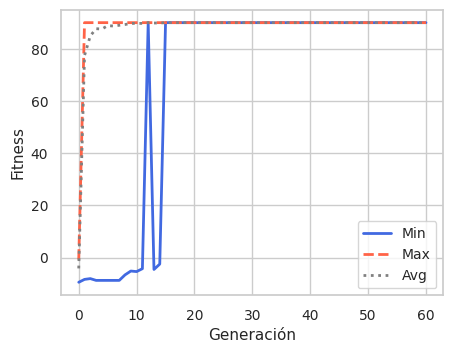

In [ ]:
plot_evolucion([logbook])

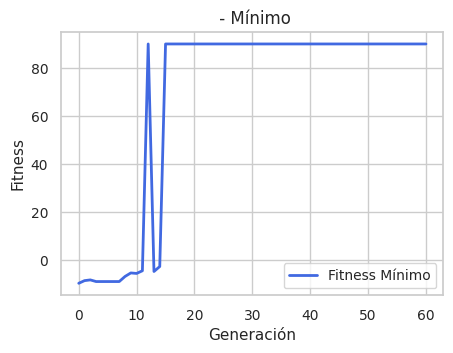

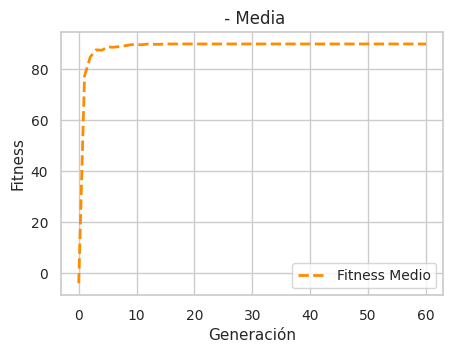

In [ ]:
plot_evolucion_doble([logbook])

**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: -9.478741
Mejor individuo [63, 25, 20, 58, 32, 3, 23, 3, 43, 49, 7, 58, 38, 14, 88, 51, 21, 90, 77, 39, 87, 70, 9, 41, 76, 60, 13, 87, 88, 8, 66, 51, 45]
Mejor fitness 2: -9.295717
Mejor individuo 2: [36, 51, 7, 8, 46, 1, 23, 49, 32, 22, 61, 27, 74, 55, 88, 58, 43, 54, 77, 4, 14, 16, 62, 19, 40, 7, 74, 76, 51, 15, 80, 35, 5]
Mejor fitness 3: -8.825668
Mejor individuo 3: [81, 59, 13, 64, 27, 40, 44, 50, 60, 43, 95, 60, 84, 96, 88, 44, 2, 21, 95, 76, 49, 38, 51, 86, 67, 43, 2, 82, 13, 33, 83, 24, 95]


**Visualización del peso y activo correspondiente**

En esta sección se presenta la distribución final de los pesos asignados a cada activo por el algoritmo genético, una vez concluido el proceso de optimización. Junto al peso óptimo, se muestra también información complementaria como la rentabilidad esperada y la varianza (como medida de riesgo) de cada activo, evaluadas en la etapa de entrenamiento (train).

Esta visualización permite interpretar de forma directa qué activos han sido seleccionados en mayor proporción dentro de la cartera óptima y cuáles han sido descartados (peso cero), ofreciendo así una perspectiva práctica sobre el resultado final del modelo. Además, el contraste entre el rendimiento esperado y el riesgo asociado a cada activo facilita el análisis de la lógica seguida por el algoritmo al momento de construir la solución óptima.

In [ ]:
pesos = funcion_pesos(hof[0])


# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Pesos': pesos,
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Pesos': "{:.3f}",
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Algoritmo Genético pesos optimos")

# Mostrar
tabla_momentos_bonita

,Rentabilidad Esperada (Media)max,Varianza min,Pesos
Acciona,0.000947,0.000364,0.059
Acerinox,0.000175,0.000395,0.000
ACS,0.000152,0.000518,0.000
Aena,0.000052,0.000391,0.054
Amadeus IT Group,0.000282,0.000484,0.000
ArcelorMittal,0.000496,0.000853,0.000
Banco Sabadell,-0.000085,0.000921,0.000
Bankinter,0.000435,0.000466,0.000
BBVA,0.000017,0.000537,0.000
CaixaBank,0.000187,0.000503,0.000


**Métricas en Train de riesgo y rendimiento global**

En esta sección se presentan los valores resultantes de la función objetivo aplicada al mejor individuo obtenido tras el entrenamiento del algoritmo genético. Esta función integra simultáneamente el rendimiento esperado y el riesgo asociado a la cartera, permitiendo evaluar la calidad global de la solución desde una perspectiva multicriterio.

Se muestra específicamente el valor de optimización alcanzado, así como los componentes clave que la conforman: la rentabilidad final de la cartera y su nivel de riesgo (medido como varianza o desviación estándar). Estas métricas permiten validar si el algoritmo ha logrado una combinación eficiente entre ambos objetivos, de acuerdo con los criterios definidos durante la fase de diseño del modelo.

In [ ]:
opt, retorno, riesgo = funcion_resultado_global(hof[0])

print(f"La optimización final es maxima: {opt}")
print(f"El retorno final es maxima: {retorno}")
print(f"El riesgo final es mínimo: {riesgo}")

La optimización final es maxima: 0.10577789737399419
El retorno final es maxima: 0.0005902135832975134
El riesgo final es mínimo: 0.005579743953604235


**Evaluación de la cartera sobre datos de test**

Tras el entrenamiento y validación de la cartera óptima, se procede a evaluar su comportamiento sobre un conjunto de datos no vistos previamente, correspondiente al periodo 2022–2025. Esta evaluación permite analizar la capacidad generalizadora del modelo y verificar si la solución obtenida mantiene un equilibrio adecuado entre rentabilidad y riesgo fuera del entorno de entrenamiento.

Se presentan diferentes métricas relevantes para este análisis, entre ellas la rentabilidad media diaria, la volatilidad y la semivarianza, así como medidas de riesgo extremo como el CVaR al 5 % y el máximo drawdown observado. Además, se calcula la rentabilidad acumulada a lo largo del periodo test, como indicativo global del rendimiento real de la cartera.

Estas métricas proporcionan una visión integral del comportamiento de la solución optimizada en condiciones reales, y permiten comparar su desempeño frente a otras estrategias o benchmarks de referencia.

- R**entabilidad Media Diaria:** Representa el promedio del rendimiento generado por la cartera cada día durante el periodo de test. Esta métrica es clave porque permite conocer si la cartera tiene una tendencia general positiva o negativa en su desempeño diario. Una rentabilidad media positiva sugiere que, en promedio, la inversión está creciendo día a día, lo cual es fundamental para evaluar la viabilidad del modelo.

- **Volatilidad Diaria:** Mide la variabilidad de los retornos diarios respecto a su media, es decir, cuánto fluctúan los rendimientos de la cartera en el corto plazo. Su importancia radica en que refleja el nivel de incertidumbre o riesgo total asociado a la estrategia: una alta volatilidad implica mayor exposición a cambios bruscos, lo que puede resultar menos atractivo para inversores con aversión al riesgo.

- **Semivarianza Diaria:** Calcula la varianza de los retornos solo en los días en los que la cartera experimenta pérdidas. Esta métrica es especialmente relevante porque permite medir el riesgo centrado únicamente en los escenarios desfavorables, lo cual resulta más representativo para muchos perfiles de inversor que priorizan la protección ante caídas frente a la simple variabilidad general.

- **Rentabilidad Acumulada:** Indica el crecimiento total del capital invertido a lo largo del periodo de evaluación, considerando el efecto compuesto de los retornos diarios. Es una métrica fundamental para conocer el resultado neto de la estrategia, ya que resume de manera clara si la cartera ha generado ganancias o pérdidas totales al final del periodo de test.

- **Drawdown:** Refleja la mayor caída sufrida por la cartera desde un pico hasta un mínimo posterior, dentro del periodo evaluado. Esta métrica es importante porque ayuda a identificar el peor escenario de pérdida temporal que pudo haber vivido un inversor, siendo un indicador clave de la estabilidad y resiliencia de la estrategia frente a crisis o momentos de alta volatilidad.

- **CVaR 5% Diario (Conditional Value at Risk):** Estima la pérdida media esperada en el 5 % de los peores días de rentabilidad. Su relevancia radica en que proporciona una visión más realista del riesgo extremo, al cuantificar no solo la probabilidad de una pérdida severa, sino también su magnitud promedio, lo que lo convierte en un indicador esencial para evaluar la exposición a eventos adversos poco frecuentes pero de gran impacto.

In [ ]:
resultados2 = resultados_test(returns_data_25, pesos, 1)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00040,0.00927,0.00004464,1.09779,-0.13874,-0.02125


## **Algoritmo Genético Simple: FO con 4 partes - CONVERGE rápido**

In [ ]:
# Límite de peso de una acción
limite_apuesta = 0.5

# Límite de distintas empresas
max_num_empresas = 15

# Total de acciones de la cartera
n = mean_returns.shape[0]

# Datos del rango escogido [a,b]
a = 0
b = 100

### Función objetivo y función de interpretación

In [ ]:
# Restricciones
# 1. Función para limitar máximo empresas
def limitar_empresas(ind):
    ind = np.array(ind)
    if np.sum(ind > 1) > max_num_empresas:
        indices_menores = np.argsort(ind)[:-max_num_empresas]
        ind[indices_menores] = 0
    ind = np.clip(ind, 0, 100)  # asegurar valores entre 0 y 1
    return ind

# 2. Limitar número de apuesta
def limitar_apuesta_maxima(ind):
    limite_apuesta = 0.5
    ind = np.array(ind)
    aux = np.clip(ind, 0, limite_apuesta)  # Limita cada valor máximo a 'limite_apuesta'
    if (aux != ind).any():
        return 1
    else:
      return 0

# 3. Solo 4 decimales de pesos
def adjust_weights(weights):
    weights = np.array(weights, dtype=float)
    weights /= np.sum(weights)  # normaliza antes por si acaso

    # Redondeamos a 4 decimales, pero sin perder el original
    rounded_weights = np.round(weights, 4)
    diff = 1 - np.sum(rounded_weights)

    # Añadimos la diferencia al valor más grande (estable)
    if abs(diff) > 1e-6:
        idx = np.argmax(rounded_weights)
        rounded_weights[idx] += diff

    return rounded_weights

# Ojito: función de interpretación
def funcion_pesos(individuo):
    individuo = limitar_empresas(individuo)

    weights = np.array(individuo, dtype=float)
    weights /= np.sum(weights) # para que la suma sea el 100% ni más, ni menos, teneindo en cuenta el peso de cada individuo

    weights = adjust_weights(weights)

    return weights # se puede ver como la resta

In [ ]:
def funcion_objetivo(individuo):

    for i in range(len(individuo)):
      if individuo[i] > b or individuo[i] < a:
          return 90,

    weights = funcion_pesos(individuo)
    penalti = limitar_apuesta_maxima(weights)

    mean_return = np.dot(mean_returns, weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    skew_portfolio = np.dot(skewness, weights)
    kurt_portfolio = np.dot(kurt, weights)

    if volatility == 0 or penalti:
        return 9999, # si se minimiza se pone una burrada de grande

    # Parámetros para ajustar la importancia de cada término
    alpha = 0.6  # peso de la rentabilidad
    # un nº menor implica mneos adversión al riesgo
    beta = 0.3   # peso de la volatilidad --> perfil del inversor 4 tipos
    gamma = 0.2  # peso de la asimetría (premiamos sesgo positivo)
    delta = 0.1  # peso de la curtosis (penalizamos curtosis alta)

    # Función objetivo final: suma ponderada
    objetivo = (alpha * mean_return) - (beta * volatility) + (gamma * skew_portfolio) - (delta * kurt_portfolio)

    return -objetivo,  # Se pone signo menos para así minimizar

### Creación AGS con FO compleja

Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# 1. Definir una función que genere números enteros entre 'a' y 'b'
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)

toolbox.register("attr_uniform", random.randint, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre 0 y el límite seleccionado distinto cada vez

toolbox.attr_uniform()

51

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, n)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio

individuo = toolbox.individual()
#individuo

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado

individuo.fitness.values

()

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, n*10*2)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 660 filas (una por cada individuo)

poblacion = toolbox.population()
#print(poblacion)

In [ ]:
# Cada individuo tiene 33 componentes = acciones

print(poblacion[0])

[8, 32, 94, 47, 24, 90, 49, 2, 39, 52, 25, 50, 69, 67, 83, 37, 37, 24, 76, 36, 95, 49, 71, 40, 45, 61, 82, 4, 80, 76, 74, 5, 100]


In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.

poblacion[0].fitness.values

()

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)

toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1

funcion_objetivo(individuo)

(np.float64(0.9227711752675029),)

In [ ]:
# Ejemplo de uso 2 --> vemos que da lo mismo

toolbox.evaluate(individuo)

(np.float64(0.9227711752675029),)

**Reproducción y selección**

- Cruce Blend
- Mutación Uniforme de Enteros
- Selección por torneo

In [ ]:
# Registrar la operación gnética de cruce por un punto
# Los individuos podrán estar formados por acciones que sean números eneteros o decimales, no afecta
# Siempre que esté en nuestra mano se pondrá enteros como en el caso de los indiviuos y posblación incial, y depsués en la mutación.
# toolbox.register(función, función tipo de cruce)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# a --> limite inferior
# b --> limite superior
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.15)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=0.05)


In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
1.  *Probabilidad de Cruce:* Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.
2.  *Probabilidad de Mutación:* Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.
3.  *Número de generaciones:* Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares

# CXPB, MUTPB, NGEN = 0.8,0.5,60
CXPB, MUTPB, NGEN = 0.8,0.4,60

In [ ]:
#Generamos la Población Inicial

pop = toolbox.population()
print(pop)

[[53, 70, 65, 41, 85, 69, 46, 89, 69, 35, 51, 76, 90, 57, 71, 38, 59, 58, 98, 69, 74, 25, 60, 23, 89, 9, 22, 94, 100, 48, 89, 89, 56], [68, 46, 33, 68, 48, 4, 3, 44, 72, 2, 82, 44, 73, 100, 98, 73, 8, 21, 74, 57, 85, 82, 77, 69, 70, 49, 82, 15, 51, 9, 13, 34, 94], [10, 47, 86, 24, 86, 48, 92, 72, 5, 87, 85, 60, 6, 1, 16, 70, 65, 94, 42, 3, 91, 30, 4, 32, 23, 12, 24, 86, 9, 93, 61, 26, 6], [83, 61, 3, 62, 99, 50, 58, 8, 85, 89, 98, 14, 4, 24, 11, 16, 65, 13, 99, 14, 100, 7, 84, 91, 54, 50, 52, 77, 40, 14, 79, 22, 87], [48, 89, 12, 59, 47, 30, 26, 50, 22, 30, 45, 89, 40, 57, 71, 65, 73, 89, 75, 45, 84, 82, 74, 1, 54, 48, 94, 30, 17, 28, 42, 26, 54], [98, 7, 88, 31, 20, 32, 66, 16, 91, 9, 23, 4, 63, 22, 65, 15, 63, 35, 32, 36, 83, 10, 29, 51, 41, 88, 2, 41, 22, 99, 63, 64, 88], [1, 47, 56, 4, 40, 42, 90, 29, 0, 57, 72, 74, 39, 92, 34, 18, 98, 58, 15, 62, 51, 3, 28, 60, 62, 25, 6, 5, 21, 13, 94, 49, 86], [41, 93, 57, 5, 55, 56, 5, 20, 16, 35, 60, 42, 0, 45, 5, 74, 92, 18, 40, 45, 38, 65, 2

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

In [ ]:
# Se confirma que hof está en el momento vacío

print(hof)

[]


In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO

stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.

stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [ ]:
# loogbook contendrá todo el registro de evolución

logbook = tools.Logbook()

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg    	std     	min     	max    
0  	660   	1.09085	0.107283	0.748923	1.41955
1  	572   	67.4799	38.6932 	0.748923	90     
2  	575   	75.8391	32.557  	0.748923	90     
3  	580   	80.9638	26.8829 	0.802409	90     
4  	576   	83.7965	22.6643 	0.802409	90     
5  	572   	83.9316	22.4339 	0.756495	90     
6  	588   	84.0671	22.1987 	0.835204	90     
7  	604   	85.8203	18.8273 	0.795163	90     
8  	576   	86.3593	17.6283 	0.909854	90     
9  	581   	86.3593	17.6281 	0.909854	90     
10 	582   	87.7086	14.0926 	0.913989	90     
11 	577   	88.1126	12.8205 	0.900824	90     
12 	579   	88.6517	10.87   	0.932756	90     
13 	593   	89.0562	9.11574 	0.894615	90     
14 	593   	88.9215	9.73638 	0.894615	90     
15 	569   	88.6523	10.8652 	0.938218	90     
16 	603   	89.7305	4.88838 	1.03538 	90     
17 	568   	89.7307	4.88428 	1.09127 	90     
18 	587   	89.8653	3.45755 	1.1065  	90     
19 	573   	90     	0       	90      	90     
20 	594   	90     	0       	90      	90     
21 	585   

### Resultados del AG Simple de FO compleja

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

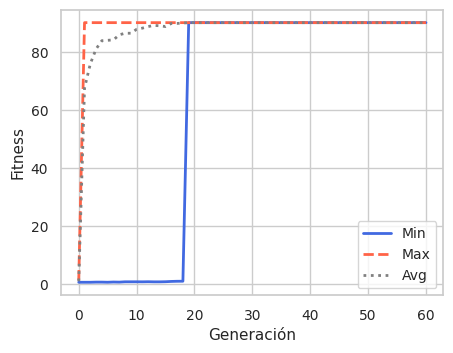

In [ ]:
plot_evolucion([logbook])

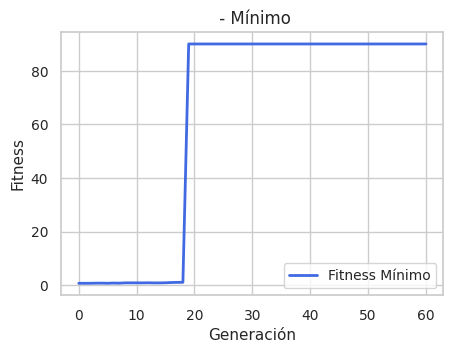

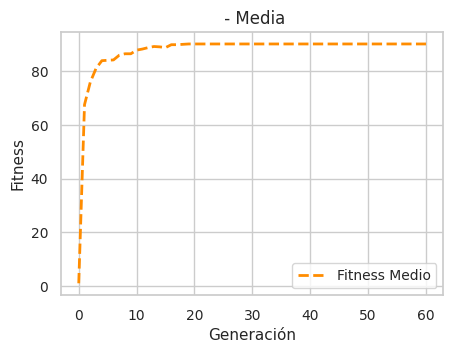

In [ ]:
plot_evolucion_doble([logbook])

**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: 0.748923
Mejor individuo [9, 54, 40, 15, 35, 74, 79, 44, 60, 26, 68, 5, 26, 73, 65, 95, 84, 9, 55, 95, 12, 72, 52, 97, 49, 20, 40, 91, 40, 17, 7, 16, 68]
Mejor fitness 2: 0.756495
Mejor individuo 2: [88.87357948055147, 73.05648119207204, 53.8112601888281, 17.16353759184736, 53.8839481038933, 62.66884262187887, 59.98073862882809, 27.09744127638128, 28.594915467182446, 89.20199789893101, 81.21778561845312, 36.029407623779576, 60.889125066357735, 55.49990173021694, 66.18167361611938, 59.633400848944376, 34.320857600537664, 5.998970723139073, 91.81889957032125, 75.9619542704261, 45.82481251172084, 10.672164161134697, 26.62803554725103, 20.270053255746102, 15.841409619191134, 32.967078945503225, 82.8581998930892, 54.51314225298582, 47.36165513910228, 24.756581660709017, 93.8997077431005, 29.54201660915625, 38.12124695112358]
Mejor fitness 3: 0.757188
Mejor individuo 3: [90, 53, 21, 17, 63, 88, 49, 89, 68, 83, 81, 5, 24, 88, 42, 77, 30, 97, 95, 50, 6, 43, 55, 24, 11, 39, 29, 6

**Visualización del peso y activo correspondiente**

En esta sección se presenta la distribución final de los pesos asignados a cada activo por el algoritmo genético, una vez concluido el proceso de optimización. Junto al peso óptimo, se muestra también información complementaria como la rentabilidad esperada y la varianza (como medida de riesgo) de cada activo, evaluadas en la etapa de entrenamiento (train).

Esta visualización permite interpretar de forma directa qué activos han sido seleccionados en mayor proporción dentro de la cartera óptima y cuáles han sido descartados (peso cero), ofreciendo así una perspectiva práctica sobre el resultado final del modelo. Además, el contraste entre el rendimiento esperado y el riesgo asociado a cada activo facilita el análisis de la lógica seguida por el algoritmo al momento de construir la solución óptima.

In [ ]:
pesos = funcion_pesos(hof[0])


# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Pesos': pesos,
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Pesos': "{:.3f}",
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Algoritmo Genético pesos optimos")

# Mostrar
tabla_momentos_bonita

,Rentabilidad Esperada (Media)max,Varianza min,Pesos
Acciona,0.000947,0.000364,0.000
Acerinox,0.000175,0.000395,0.048
ACS,0.000152,0.000518,0.000
Aena,0.000052,0.000391,0.000
Amadeus IT Group,0.000282,0.000484,0.000
ArcelorMittal,0.000496,0.000853,0.066
Banco Sabadell,-0.000085,0.000921,0.070
Bankinter,0.000435,0.000466,0.000
BBVA,0.000017,0.000537,0.053
CaixaBank,0.000187,0.000503,0.000


**Métricas en Train de riesgo y rendimiento global**

En esta sección se presentan los valores resultantes de la función objetivo aplicada al mejor individuo obtenido tras el entrenamiento del algoritmo genético. Esta función integra simultáneamente el rendimiento esperado y el riesgo asociado a la cartera, permitiendo evaluar la calidad global de la solución desde una perspectiva multicriterio.

Se muestra específicamente el valor de optimización alcanzado, así como los componentes clave que la conforman: la rentabilidad final de la cartera y su nivel de riesgo (medido como varianza o desviación estándar). Estas métricas permiten validar si el algoritmo ha logrado una combinación eficiente entre ambos objetivos, de acuerdo con los criterios definidos durante la fase de diseño del modelo.

In [ ]:
opt, retorno, riesgo = funcion_resultado_global(hof[0])

print(f"La optimización final es maxima: {opt}")
print(f"El retorno final es maxima: {retorno}")
print(f"El riesgo final es mínimo: {riesgo}")

La optimización final es maxima: 0.04310191499046016
El retorno final es maxima: 0.00028812682164565433
El riesgo final es mínimo: 0.006684780054654788


**Evaluación de la cartera sobre datos de test**

Tras el entrenamiento y validación de la cartera óptima, se procede a evaluar su comportamiento sobre un conjunto de datos no vistos previamente, correspondiente al periodo 2022–2025. Esta evaluación permite analizar la capacidad generalizadora del modelo y verificar si la solución obtenida mantiene un equilibrio adecuado entre rentabilidad y riesgo fuera del entorno de entrenamiento.

Se presentan diferentes métricas relevantes para este análisis, entre ellas la rentabilidad media diaria, la volatilidad y la semivarianza, así como medidas de riesgo extremo como el CVaR al 5 % y el máximo drawdown observado. Además, se calcula la rentabilidad acumulada a lo largo del periodo test, como indicativo global del rendimiento real de la cartera.

Estas métricas proporcionan una visión integral del comportamiento de la solución optimizada en condiciones reales, y permiten comparar su desempeño frente a otras estrategias o benchmarks de referencia.

- R**entabilidad Media Diaria:** Representa el promedio del rendimiento generado por la cartera cada día durante el periodo de test. Esta métrica es clave porque permite conocer si la cartera tiene una tendencia general positiva o negativa en su desempeño diario. Una rentabilidad media positiva sugiere que, en promedio, la inversión está creciendo día a día, lo cual es fundamental para evaluar la viabilidad del modelo.

- **Volatilidad Diaria:** Mide la variabilidad de los retornos diarios respecto a su media, es decir, cuánto fluctúan los rendimientos de la cartera en el corto plazo. Su importancia radica en que refleja el nivel de incertidumbre o riesgo total asociado a la estrategia: una alta volatilidad implica mayor exposición a cambios bruscos, lo que puede resultar menos atractivo para inversores con aversión al riesgo.

- **Semivarianza Diaria:** Calcula la varianza de los retornos solo en los días en los que la cartera experimenta pérdidas. Esta métrica es especialmente relevante porque permite medir el riesgo centrado únicamente en los escenarios desfavorables, lo cual resulta más representativo para muchos perfiles de inversor que priorizan la protección ante caídas frente a la simple variabilidad general.

- **Rentabilidad Acumulada:** Indica el crecimiento total del capital invertido a lo largo del periodo de evaluación, considerando el efecto compuesto de los retornos diarios. Es una métrica fundamental para conocer el resultado neto de la estrategia, ya que resume de manera clara si la cartera ha generado ganancias o pérdidas totales al final del periodo de test.

- **Drawdown:** Refleja la mayor caída sufrida por la cartera desde un pico hasta un mínimo posterior, dentro del periodo evaluado. Esta métrica es importante porque ayuda a identificar el peor escenario de pérdida temporal que pudo haber vivido un inversor, siendo un indicador clave de la estabilidad y resiliencia de la estrategia frente a crisis o momentos de alta volatilidad.

- **CVaR 5% Diario (Conditional Value at Risk):** Estima la pérdida media esperada en el 5 % de los peores días de rentabilidad. Su relevancia radica en que proporciona una visión más realista del riesgo extremo, al cuantificar no solo la probabilidad de una pérdida severa, sino también su magnitud promedio, lo que lo convierte en un indicador esencial para evaluar la exposición a eventos adversos poco frecuentes pero de gran impacto.

In [ ]:
resultados2 = resultados_test(returns_data_25, pesos, 1)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00098,0.01045,0.00005396,1.25846,-0.15852,-0.02361


## **Algoritmo Genético Simple: FO con 4 partes - CONVERGE lento**

In [ ]:
# Límite de peso de una acción
limite_apuesta = 0.5

# Límite de distintas empresas
max_num_empresas = 15

# Total de acciones de la cartera
n = mean_returns.shape[0]

# Datos del rango escogido [a,b]
a = 0
b = 100

### Función objetivo y función de interpretación

In [ ]:
# Restricciones
# 1. Función para limitar máximo empresas
def limitar_empresas(ind):
    ind = np.array(ind)
    if np.sum(ind > 1) > max_num_empresas:
        indices_menores = np.argsort(ind)[:-max_num_empresas]
        ind[indices_menores] = 0
    ind = np.clip(ind, 0, 100)  # asegurar valores entre 0 y 1
    return ind

# 2. Limitar número de apuesta
def limitar_apuesta_maxima(ind):
    limite_apuesta = 0.5
    ind = np.array(ind)
    aux = np.clip(ind, 0, limite_apuesta)  # Limita cada valor máximo a 'limite_apuesta'
    if (aux != ind).any():
        return 1
    else:
      return 0

# 3. Solo 4 decimales de pesos
def adjust_weights(weights):
    weights = np.array(weights, dtype=float)
    weights /= np.sum(weights)  # normaliza antes por si acaso

    # Redondeamos a 4 decimales, pero sin perder el original
    rounded_weights = np.round(weights, 4)
    diff = 1 - np.sum(rounded_weights)

    # Añadimos la diferencia al valor más grande (estable)
    if abs(diff) > 1e-6:
        idx = np.argmax(rounded_weights)
        rounded_weights[idx] += diff

    return rounded_weights

# Ojito: función de interpretación
def funcion_pesos(individuo):
    individuo = limitar_empresas(individuo)

    weights = np.array(individuo, dtype=float)
    weights /= np.sum(weights) # para que la suma sea el 100% ni más, ni menos, teneindo en cuenta el peso de cada individuo

    weights = adjust_weights(weights)

    return weights # se puede ver como la resta

In [ ]:
def funcion_objetivo(individuo):

    for i in range(len(individuo)):
      if individuo[i] > b or individuo[i] < a:
          return 90,

    weights = funcion_pesos(individuo)
    penalti = limitar_apuesta_maxima(weights)

    mean_return = np.dot(mean_returns, weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    skew_portfolio = np.dot(skewness, weights)
    kurt_portfolio = np.dot(kurt, weights)

    if volatility == 0 or penalti:
        return 9999, # si se minimiza se pone una burrada de grande

    # Parámetros para ajustar la importancia de cada término
    alpha = 0.6  # peso de la rentabilidad
    # un nº menor implica mneos adversión al riesgo
    beta = 0.3   # peso de la volatilidad --> perfil del inversor 4 tipos
    gamma = 0.2  # peso de la asimetría (premiamos sesgo positivo)
    delta = 0.1  # peso de la curtosis (penalizamos curtosis alta)

    # Función objetivo final: suma ponderada
    objetivo = (alpha * mean_return) - (beta * volatility) + (gamma * skew_portfolio) - (delta * kurt_portfolio)

    return -objetivo,  # Se pone signo menos para así minimizar

### Creación AGS con FO compleja

Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# 1. Definir una función que genere números enteros entre 'a' y 'b'
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)

toolbox.register("attr_uniform", random.randint, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre 0 y el límite seleccionado distinto cada vez

toolbox.attr_uniform()

49

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, n)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio

individuo = toolbox.individual()
#individuo

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado

individuo.fitness.values

()

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, n*10*2)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 660 filas (una por cada individuo)

poblacion = toolbox.population()
#print(poblacion)

In [ ]:
# Cada individuo tiene 33 componentes = acciones

print(poblacion[0])

[12, 45, 55, 40, 78, 81, 26, 70, 61, 56, 66, 33, 7, 70, 1, 11, 92, 51, 90, 100, 85, 80, 0, 78, 63, 42, 31, 93, 41, 90, 8, 24, 72]


In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.

poblacion[0].fitness.values

()

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)

toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1

funcion_objetivo(individuo)

(np.float64(0.9928218251905565),)

In [ ]:
# Ejemplo de uso 2 --> vemos que da lo mismo

toolbox.evaluate(individuo)

(np.float64(0.9928218251905565),)

**Reproducción y selección**

- Cruce Blend
- Mutación Uniforme de Enteros
- Selección por torneo

In [ ]:
# Registrar la operación gnética de cruce por un punto
# Los individuos podrán estar formados por acciones que sean números eneteros o decimales, no afecta
# Siempre que esté en nuestra mano se pondrá enteros como en el caso de los indiviuos y posblación incial, y depsués en la mutación.
# toolbox.register(función, función tipo de cruce)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# a --> limite inferior
# b --> limite superior
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.15)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=0.05)


In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
1.  *Probabilidad de Cruce:* Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.
2.  *Probabilidad de Mutación:* Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.
3.  *Número de generaciones:* Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares

# CXPB, MUTPB, NGEN = 0.8,0.5,60
CXPB, MUTPB, NGEN = 0.2,0.8,60

In [ ]:
#Generamos la Población Inicial

pop = toolbox.population()
print(pop)

[[52, 48, 21, 15, 11, 81, 1, 6, 64, 87, 26, 79, 68, 38, 14, 75, 30, 88, 74, 22, 50, 8, 85, 98, 37, 100, 27, 15, 13, 52, 87, 65, 89], [91, 3, 98, 23, 61, 35, 77, 42, 42, 50, 76, 89, 75, 41, 18, 75, 64, 43, 23, 89, 84, 96, 6, 92, 45, 75, 60, 36, 12, 91, 19, 50, 28], [40, 90, 66, 16, 100, 85, 0, 20, 65, 43, 6, 34, 69, 95, 49, 51, 84, 72, 69, 89, 97, 38, 100, 95, 60, 20, 93, 58, 41, 60, 28, 27, 72], [22, 14, 99, 64, 0, 46, 29, 34, 70, 78, 23, 35, 4, 49, 21, 19, 84, 83, 86, 52, 46, 60, 92, 9, 55, 24, 23, 36, 77, 49, 60, 74, 68], [57, 22, 43, 98, 48, 59, 94, 47, 0, 72, 71, 82, 68, 56, 43, 71, 88, 93, 44, 35, 11, 11, 17, 77, 45, 13, 82, 89, 35, 43, 17, 50, 89], [23, 5, 58, 35, 30, 88, 48, 78, 24, 66, 20, 69, 38, 81, 20, 58, 31, 82, 11, 86, 45, 24, 68, 95, 24, 61, 48, 6, 94, 3, 8, 30, 89], [4, 23, 58, 70, 67, 67, 50, 1, 10, 23, 83, 92, 88, 28, 19, 34, 40, 16, 8, 87, 75, 21, 12, 84, 1, 100, 29, 35, 82, 31, 34, 87, 53], [87, 21, 98, 35, 36, 33, 32, 27, 4, 75, 64, 91, 63, 12, 3, 75, 86, 98, 44, 8

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

In [ ]:
# Se confirma que hof está en el momento vacío

print(hof)

[]


In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO

stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.

stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [ ]:
# loogbook contendrá todo el registro de evolución

logbook = tools.Logbook()

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg    	std     	min     	max    
0  	660   	1.09159	0.107386	0.809158	1.41022
1  	558   	18.1294	35.0825 	0.801226	90     
2  	558   	17.419 	34.5631 	0.735674	90     
3  	555   	17.6573	34.7955 	0.778686	90     
4  	543   	16.9573	34.2572 	0.771243	90     
5  	559   	18.9616	35.8552 	0.750919	90     
6  	552   	18.4055	35.458  	0.728544	90     
7  	560   	18.7979	35.7695 	0.704762	90     
8  	553   	13.7874	31.4429 	0.710994	90     
9  	535   	13.504 	31.1741 	0.717198	90     
10 	565   	16.3345	33.8388 	0.717198	90     
11 	561   	18.6261	35.687  	0.670842	90     
12 	561   	14.6967	32.3821 	0.659812	90     
13 	547   	14.9618	32.6385 	0.659665	90     
14 	565   	15.6302	33.2592 	0.635981	90     
15 	545   	14.5366	32.2641 	0.659665	90     
16 	556   	14.8004	32.5233 	0.647747	90     
17 	553   	13.9806	31.7446 	0.629691	90     
18 	553   	13.7022	31.4781 	0.629691	90     
19 	552   	15.9969	33.6353 	0.629691	90     
20 	550   	12.2059	29.9104 	0.627587	90     
21 	561   

### Resultados del AG Simple de FO compleja

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

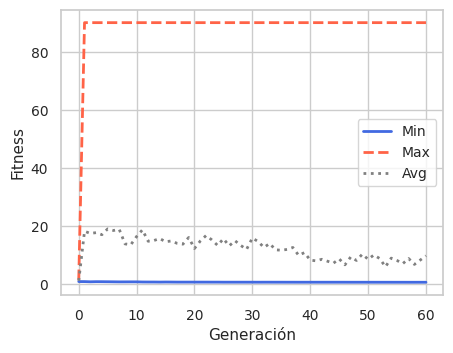

In [ ]:
plot_evolucion([logbook])

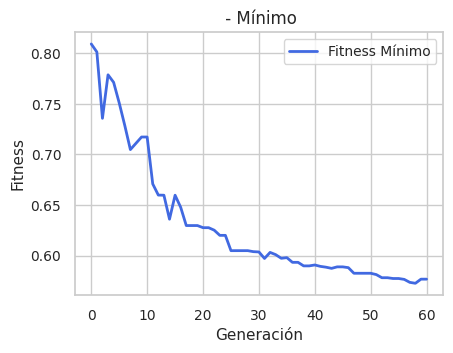

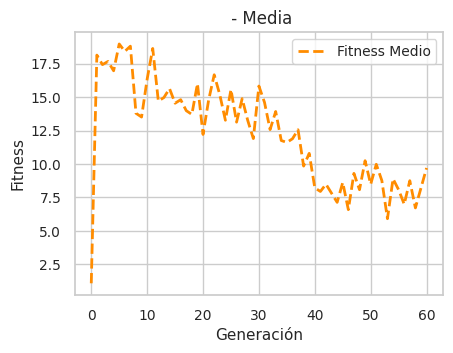

In [ ]:
plot_evolucion_doble([logbook])

**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: 0.572633
Mejor individuo [14.941913512302099, 71.52790836878516, 27.195533798598884, 10.071844400510168, 29.604382931043496, 95.85237693309837, 29.80697586053569, 7.498158973952207, 32.888369903856585, 96.35438177208181, 91.90368980838903, 25.89554305083795, 17.51031594461045, 21.94096572299993, 31.256953880742582, 72.33692523582928, 4.449942313008073, 0.86172105705083, 94.20078549543543, 90.24111243175979, 13.282178340589489, 0.0, 16.593326227332298, 23, 7.945628009302734, 6.514876378071233, 11.709550480621283, 94.54148661733245, 21.10333548389506, 34.07740447432889, 30.341836820253615, 10.201021364217784, 35.220269683080346]
Mejor fitness 2: 0.573546
Mejor individuo 2: [15.211381360609252, 84, 18.24607166317203, 10.07184440051017, 47.8521629065438, 78.91892438297401, 44.245616741606106, 3.251337900878143, 32.82397039167568, 98.17840598209293, 92.84118237371976, 19.627875363221882, 19.63395556847066, 9, 31.93016369437023, 97, 20, 19, 42.78986741700246, 52, 3.88419822164

**Visualización del peso y activo correspondiente**

En esta sección se presenta la distribución final de los pesos asignados a cada activo por el algoritmo genético, una vez concluido el proceso de optimización. Junto al peso óptimo, se muestra también información complementaria como la rentabilidad esperada y la varianza (como medida de riesgo) de cada activo, evaluadas en la etapa de entrenamiento (train).

Esta visualización permite interpretar de forma directa qué activos han sido seleccionados en mayor proporción dentro de la cartera óptima y cuáles han sido descartados (peso cero), ofreciendo así una perspectiva práctica sobre el resultado final del modelo. Además, el contraste entre el rendimiento esperado y el riesgo asociado a cada activo facilita el análisis de la lógica seguida por el algoritmo al momento de construir la solución óptima.

In [ ]:
pesos = funcion_pesos(hof[0])


# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Pesos': pesos,
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Pesos': "{:.3f}",
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Algoritmo Genético pesos optimos")

# Mostrar
tabla_momentos_bonita

,Rentabilidad Esperada (Media)max,Varianza min,Pesos
Acciona,0.000947,0.000364,0.000
Acerinox,0.000175,0.000395,0.077
ACS,0.000152,0.000518,0.000
Aena,0.000052,0.000391,0.000
Amadeus IT Group,0.000282,0.000484,0.032
ArcelorMittal,0.000496,0.000853,0.103
Banco Sabadell,-0.000085,0.000921,0.032
Bankinter,0.000435,0.000466,0.000
BBVA,0.000017,0.000537,0.035
CaixaBank,0.000187,0.000503,0.104


**Métricas en Train de riesgo y rendimiento global**

En esta sección se presentan los valores resultantes de la función objetivo aplicada al mejor individuo obtenido tras el entrenamiento del algoritmo genético. Esta función integra simultáneamente el rendimiento esperado y el riesgo asociado a la cartera, permitiendo evaluar la calidad global de la solución desde una perspectiva multicriterio.

Se muestra específicamente el valor de optimización alcanzado, así como los componentes clave que la conforman: la rentabilidad final de la cartera y su nivel de riesgo (medido como varianza o desviación estándar). Estas métricas permiten validar si el algoritmo ha logrado una combinación eficiente entre ambos objetivos, de acuerdo con los criterios definidos durante la fase de diseño del modelo.

In [ ]:
opt, retorno, riesgo = funcion_resultado_global(hof[0])

print(f"La optimización final es maxima: {opt}")
print(f"El retorno final es maxima: {retorno}")
print(f"El riesgo final es mínimo: {riesgo}")

La optimización final es maxima: 0.06267954144875641
El retorno final es maxima: 0.0004260792372740662
El riesgo final es mínimo: 0.006797740178466475


**Evaluación de la cartera sobre datos de test**

Tras el entrenamiento y validación de la cartera óptima, se procede a evaluar su comportamiento sobre un conjunto de datos no vistos previamente, correspondiente al periodo 2022–2025. Esta evaluación permite analizar la capacidad generalizadora del modelo y verificar si la solución obtenida mantiene un equilibrio adecuado entre rentabilidad y riesgo fuera del entorno de entrenamiento.

Se presentan diferentes métricas relevantes para este análisis, entre ellas la rentabilidad media diaria, la volatilidad y la semivarianza, así como medidas de riesgo extremo como el CVaR al 5 % y el máximo drawdown observado. Además, se calcula la rentabilidad acumulada a lo largo del periodo test, como indicativo global del rendimiento real de la cartera.

Estas métricas proporcionan una visión integral del comportamiento de la solución optimizada en condiciones reales, y permiten comparar su desempeño frente a otras estrategias o benchmarks de referencia.

- R**entabilidad Media Diaria:** Representa el promedio del rendimiento generado por la cartera cada día durante el periodo de test. Esta métrica es clave porque permite conocer si la cartera tiene una tendencia general positiva o negativa en su desempeño diario. Una rentabilidad media positiva sugiere que, en promedio, la inversión está creciendo día a día, lo cual es fundamental para evaluar la viabilidad del modelo.

- **Volatilidad Diaria:** Mide la variabilidad de los retornos diarios respecto a su media, es decir, cuánto fluctúan los rendimientos de la cartera en el corto plazo. Su importancia radica en que refleja el nivel de incertidumbre o riesgo total asociado a la estrategia: una alta volatilidad implica mayor exposición a cambios bruscos, lo que puede resultar menos atractivo para inversores con aversión al riesgo.

- **Semivarianza Diaria:** Calcula la varianza de los retornos solo en los días en los que la cartera experimenta pérdidas. Esta métrica es especialmente relevante porque permite medir el riesgo centrado únicamente en los escenarios desfavorables, lo cual resulta más representativo para muchos perfiles de inversor que priorizan la protección ante caídas frente a la simple variabilidad general.

- **Rentabilidad Acumulada:** Indica el crecimiento total del capital invertido a lo largo del periodo de evaluación, considerando el efecto compuesto de los retornos diarios. Es una métrica fundamental para conocer el resultado neto de la estrategia, ya que resume de manera clara si la cartera ha generado ganancias o pérdidas totales al final del periodo de test.

- **Drawdown:** Refleja la mayor caída sufrida por la cartera desde un pico hasta un mínimo posterior, dentro del periodo evaluado. Esta métrica es importante porque ayuda a identificar el peor escenario de pérdida temporal que pudo haber vivido un inversor, siendo un indicador clave de la estabilidad y resiliencia de la estrategia frente a crisis o momentos de alta volatilidad.

- **CVaR 5% Diario (Conditional Value at Risk):** Estima la pérdida media esperada en el 5 % de los peores días de rentabilidad. Su relevancia radica en que proporciona una visión más realista del riesgo extremo, al cuantificar no solo la probabilidad de una pérdida severa, sino también su magnitud promedio, lo que lo convierte en un indicador esencial para evaluar la exposición a eventos adversos poco frecuentes pero de gran impacto.

In [ ]:
resultados2 = resultados_test(returns_data_25, pesos, 1)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00086,0.01059,0.00005687,1.21395,-0.16298,-0.02443


## **Algoritmo Genético Multiobjetivo: 2 objetivos**

In [ ]:
# Límite de peso de una acción
limite_apuesta = 50

# Límite de distintas empresas
max_num_empresas = 15

# Total de acciones de la cartera
n = mean_returns.shape[0]

# Datos del rango escogido [a,b]
a = 0
b = 100

### Función objetivo y función de interpretación

In [ ]:
# Restricciones
# 1. Función para limitar máximo empresas
def limitar_empresas(ind):
    ind = np.array(ind)
    if np.sum(ind > 1) > max_num_empresas:
        indices_menores = np.argsort(ind)[:-max_num_empresas]
        ind[indices_menores] = 0
    ind = np.clip(ind, 0, 100)  # asegurar valores entre 0 y 1
    return ind

# 2. Limitar número de apuesta
def limitar_apuesta_maxima(ind):
    limite_apuesta = 0.5
    ind = np.array(ind)
    aux = np.clip(ind, 0, limite_apuesta)  # Limita cada valor máximo a 'limite_apuesta'
    if (aux != ind).any():
        return 1
    else:
      return 0

# 3. Solo 4 decimales de pesos
def adjust_weights(weights):
    weights = np.array(weights, dtype=float)
    weights /= np.sum(weights)  # normaliza antes por si acaso

    # Redondeamos a 4 decimales, pero sin perder el original
    rounded_weights = np.round(weights, 4)
    diff = 1 - np.sum(rounded_weights)

    # Añadimos la diferencia al valor más grande (estable)
    if abs(diff) > 1e-6:
        idx = np.argmax(rounded_weights)
        rounded_weights[idx] += diff

    return rounded_weights

# Ojito: función de interpretación
def funcion_pesos(individuo):
    individuo = limitar_empresas(individuo)

    weights = np.array(individuo, dtype=float)
    weights /= np.sum(weights) # para que la suma sea el 100% ni más, ni menos, teneindo en cuenta el peso de cada individuo

    weights = adjust_weights(weights)

    return weights # se puede ver como la resta

In [ ]:
def funcion_objetivo_2(individuo):

    for i in range(len(individuo)):
      if individuo[i] > b or individuo[i] < a:
          return -90, 90,

    weights = funcion_pesos(individuo)
    penalti = limitar_apuesta_maxima(weights)

    mean_return = np.dot(mean_returns, weights) # max
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) # min

    if volatility == 0 or penalti:
        return -9999, 9999, # si se minimiza se pone una burrada de grande

    return mean_return, volatility,

### Creación Algoritmo Multiobjetivo (MOGA) 2 objetivos = que simple

In [ ]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))  # 4 objetivos
creator.create("Individual", list, fitness=creator.FitnessMulti)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("attr_float", random.randint, a, b)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 200)
poblacion = toolbox.population()
toolbox.register("evaluate", funcion_objetivo_2)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=0.05)
toolbox.register("select", tools.selNSGA2)

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)  # accede al vector de 4 objetivos

stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [ ]:
pop = toolbox.population()
pop = tools.selNSGA2(pop, len(pop))
hof = tools.ParetoFront()
logbook = tools.Logbook() # loogbook contendrá todo el registro de evolución
hof = tools.HallOfFame(3)

CXPB, MUTPB, NGEN = 0.8,0.1,60


pop, logbook = algorithms.eaMuPlusLambda(
    pop, toolbox,
    mu=100, lambda_=200,
    cxpb=CXPB, mutpb=MUTPB,
    ngen=NGEN,
    stats=stats,
    halloffame=hof,
    verbose=True
)

gen	nevals	avg                    	std                    	min                            	max                    
0  	200   	[0.00035664 0.01315067]	[0.00012176 0.00091974]	[9.31620516e-05 1.08696092e-02]	[0.00069563 0.01520839]
1  	188   	[0.0004429  0.01249933]	[0.00011126 0.00076687]	[0.00013896 0.01086961]        	[0.00069563 0.0146397 ]
2  	186   	[0.00045676 0.01229612]	[0.00011446 0.00083348]	[0.00013896 0.01086961]        	[0.00069563 0.0146397 ]
3  	182   	[0.00047289 0.01214978]	[0.00011264 0.00081762]	[0.00030101 0.01080299]        	[0.00069563 0.01440291]
4  	181   	[0.00049089 0.01202038]	[0.00011627 0.00084797]	[0.00025537 0.0106416 ]        	[0.00069563 0.01407573]
5  	183   	[0.00049888 0.01192282]	[0.00010942 0.00086802]	[0.0003245 0.0106416]          	[0.00069563 0.01407573]
6  	181   	[0.0004981  0.01175023]	[0.00011159 0.00084944]	[0.0003036 0.0106416]          	[0.00069563 0.01374543]
7  	185   	[0.00048729 0.01149879]	[0.00011189 0.00065965]	[0.0003036 0.0106416]

### Resultados del MOGA de 2 objetivos

**Frente de pareto**

Para evaluar la eficacia del algoritmo genético propuesto, se comparó la distribución de soluciones en la población inicial con el frente de Pareto obtenido tras completar el proceso evolutivo. En ambos casos, se consideraron como objetivos la maximización de la rentabilidad esperada y la minimización del riesgo (volatilidad).

La visualización de la población inicial permite observar la dispersión aleatoria de los individuos antes de aplicar operadores evolutivos. En contraste, el gráfico de la población final muestra cómo el algoritmo ha sido capaz de concentrar las soluciones hacia un conjunto no dominado, representando configuraciones más eficientes en el espacio riesgo-rentabilidad.

Esta comparación evidencia la capacidad del modelo para explorar el espacio de búsqueda y dirigir la evolución hacia regiones óptimas, donde se logra un mejor equilibrio entre rendimiento y riesgo. Además, refuerza la utilidad del enfoque multiobjetivo para generar un conjunto diverso de soluciones finales que satisfacen distintos perfiles de inversión.

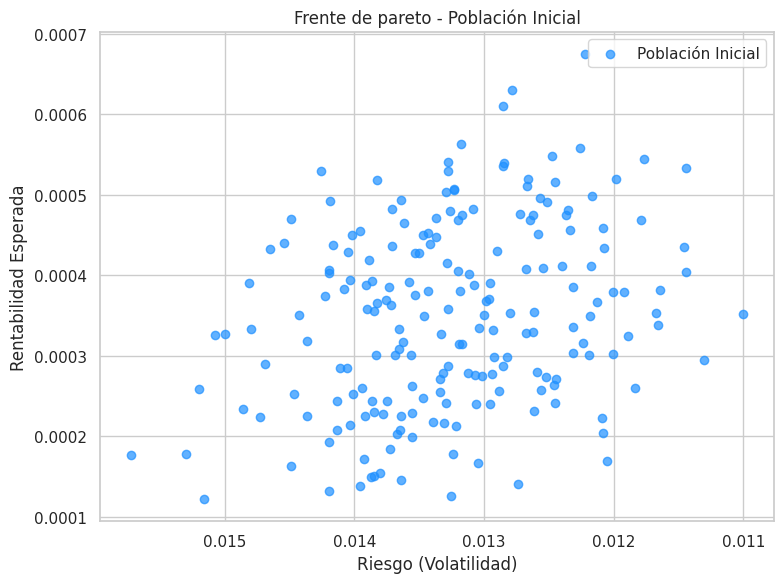

In [ ]:
plot_poblacion_inicial(poblacion, funcion_objetivo_2)

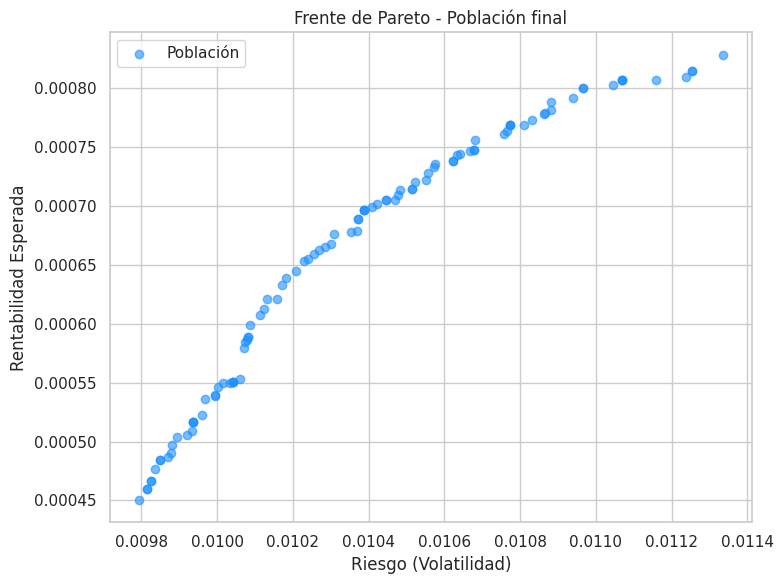

In [ ]:
plot_pareto_2d(hof, pop)

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

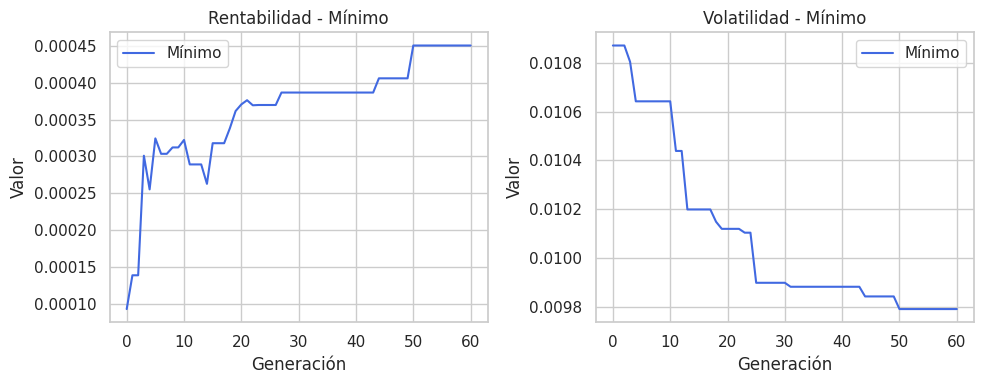

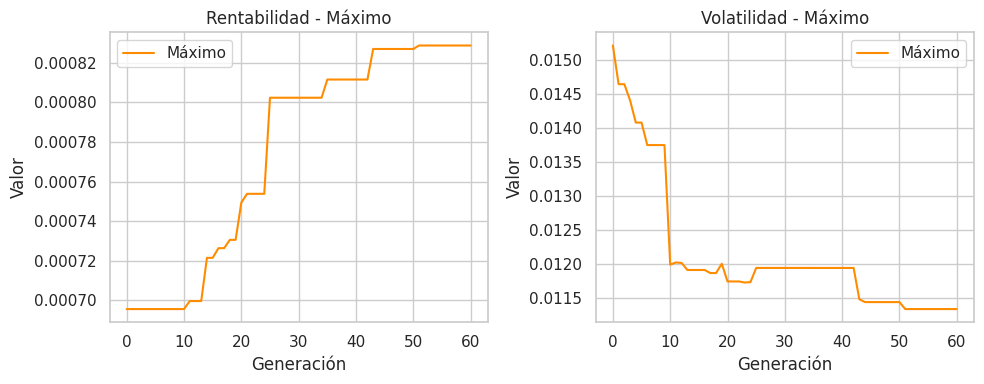

In [ ]:
nombres = ['Rentabilidad', 'Volatilidad']
graficar_objetivos_por_generacion(logbook, nombres)


**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness 1:", hof[0].fitness.values)
print("Mejor individuo 1:", hof[0])

print("Mejor fitness 2:", hof[1].fitness.values)
print("Mejor individuo 2:", hof[1])

print("Mejor fitness 3:", hof[2].fitness.values)
print("Mejor individuo 3:", hof[2])


Mejor fitness 1: (np.float64(0.0008287315824764441), np.float64(0.011335742305630468))
Mejor individuo 1: [55.615078794664896, 40.97605471812347, 50.09196975335074, 15.61125018573636, 20.568059239414154, 30.637864231087278, 26.597608737789464, 50.27535271325982, 33.38973203306012, 18.287522994260456, 99.31771751645672, 57.30312204627476, 65.77758400193308, 70.56612727897279, 89.80775819976319, 37.71281293772712, 30.3948299621554, 83.19506550537824, 22.15560012213957, 11.880996912655824, 36.572639123186875, 68.88896634250516, 31.85660270788674, 9.516625094310577, 55.2041710765032, 71.91772989407016, 46.28728404357767, 98.89004426533373, 35.9136230616827, 40.82226684313048, 99.50639301637635, 44.82890559323695, 41.67797808051954]
Mejor fitness 2: (np.float64(0.0008269846519735883), np.float64(0.011438221559646283))
Mejor individuo 2: [64.82190769556023, 35.5827919892731, 41.75006301811193, 15.608888648833442, 50.7504581401337, 25.948657782588988, 22.92515629682564, 58.261129716522916, 6.

**Visualización del peso y activo correspondiente**

En esta sección se presenta la distribución final de los pesos asignados a cada activo por el algoritmo genético, una vez concluido el proceso de optimización. Junto al peso óptimo, se muestra también información complementaria como la rentabilidad esperada y la varianza (como medida de riesgo) de cada activo, evaluadas en la etapa de entrenamiento (train).

Esta visualización permite interpretar de forma directa qué activos han sido seleccionados en mayor proporción dentro de la cartera óptima y cuáles han sido descartados (peso cero), ofreciendo así una perspectiva práctica sobre el resultado final del modelo. Además, el contraste entre el rendimiento esperado y el riesgo asociado a cada activo facilita el análisis de la lógica seguida por el algoritmo al momento de construir la solución óptima.

In [ ]:
pesos = funcion_pesos(hof[0])


# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Pesos': pesos,
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Pesos': "{:.3f}",
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Algoritmo Genético pesos optimos")

# Mostrar
tabla_momentos_bonita

,Rentabilidad Esperada (Media)max,Varianza min,Pesos
Acciona,0.000947,0.000364,0.052
Acerinox,0.000175,0.000395,0.000
ACS,0.000152,0.000518,0.047
Aena,0.000052,0.000391,0.000
Amadeus IT Group,0.000282,0.000484,0.000
ArcelorMittal,0.000496,0.000853,0.000
Banco Sabadell,-0.000085,0.000921,0.000
Bankinter,0.000435,0.000466,0.047
BBVA,0.000017,0.000537,0.000
CaixaBank,0.000187,0.000503,0.000


**Métricas en Train de riesgo y rendimiento global**

En esta sección se presentan los valores resultantes de la función objetivo aplicada al mejor individuo obtenido tras el entrenamiento del algoritmo genético. Esta función integra simultáneamente el rendimiento esperado y el riesgo asociado a la cartera, permitiendo evaluar la calidad global de la solución desde una perspectiva multicriterio.

Se muestra específicamente el valor de optimización alcanzado, así como los componentes clave que la conforman: la rentabilidad final de la cartera y su nivel de riesgo (medido como varianza o desviación estándar). Estas métricas permiten validar si el algoritmo ha logrado una combinación eficiente entre ambos objetivos, de acuerdo con los criterios definidos durante la fase de diseño del modelo.

In [ ]:
opt, retorno, riesgo = funcion_resultado_global(hof[0])

print(f"La optimización final es maxima: {opt}")
print(f"El retorno final es maxima: {retorno}")
print(f"El riesgo final es mínimo: {riesgo}")

La optimización final es maxima: 0.14621567077522798
El retorno final es maxima: 0.0008287315824764441
El riesgo final es mínimo: 0.005667871152815234


**Evaluación de la cartera sobre datos de test**

Tras el entrenamiento y validación de la cartera óptima, se procede a evaluar su comportamiento sobre un conjunto de datos no vistos previamente, correspondiente al periodo 2022–2025. Esta evaluación permite analizar la capacidad generalizadora del modelo y verificar si la solución obtenida mantiene un equilibrio adecuado entre rentabilidad y riesgo fuera del entorno de entrenamiento.

Se presentan diferentes métricas relevantes para este análisis, entre ellas la rentabilidad media diaria, la volatilidad y la semivarianza, así como medidas de riesgo extremo como el CVaR al 5 % y el máximo drawdown observado. Además, se calcula la rentabilidad acumulada a lo largo del periodo test, como indicativo global del rendimiento real de la cartera.

Estas métricas proporcionan una visión integral del comportamiento de la solución optimizada en condiciones reales, y permiten comparar su desempeño frente a otras estrategias o benchmarks de referencia.

- R**entabilidad Media Diaria:** Representa el promedio del rendimiento generado por la cartera cada día durante el periodo de test. Esta métrica es clave porque permite conocer si la cartera tiene una tendencia general positiva o negativa en su desempeño diario. Una rentabilidad media positiva sugiere que, en promedio, la inversión está creciendo día a día, lo cual es fundamental para evaluar la viabilidad del modelo.

- **Volatilidad Diaria:** Mide la variabilidad de los retornos diarios respecto a su media, es decir, cuánto fluctúan los rendimientos de la cartera en el corto plazo. Su importancia radica en que refleja el nivel de incertidumbre o riesgo total asociado a la estrategia: una alta volatilidad implica mayor exposición a cambios bruscos, lo que puede resultar menos atractivo para inversores con aversión al riesgo.

- **Semivarianza Diaria:** Calcula la varianza de los retornos solo en los días en los que la cartera experimenta pérdidas. Esta métrica es especialmente relevante porque permite medir el riesgo centrado únicamente en los escenarios desfavorables, lo cual resulta más representativo para muchos perfiles de inversor que priorizan la protección ante caídas frente a la simple variabilidad general.

- **Rentabilidad Acumulada:** Indica el crecimiento total del capital invertido a lo largo del periodo de evaluación, considerando el efecto compuesto de los retornos diarios. Es una métrica fundamental para conocer el resultado neto de la estrategia, ya que resume de manera clara si la cartera ha generado ganancias o pérdidas totales al final del periodo de test.

- **Drawdown:** Refleja la mayor caída sufrida por la cartera desde un pico hasta un mínimo posterior, dentro del periodo evaluado. Esta métrica es importante porque ayuda a identificar el peor escenario de pérdida temporal que pudo haber vivido un inversor, siendo un indicador clave de la estabilidad y resiliencia de la estrategia frente a crisis o momentos de alta volatilidad.

- **CVaR 5% Diario (Conditional Value at Risk):** Estima la pérdida media esperada en el 5 % de los peores días de rentabilidad. Su relevancia radica en que proporciona una visión más realista del riesgo extremo, al cuantificar no solo la probabilidad de una pérdida severa, sino también su magnitud promedio, lo que lo convierte en un indicador esencial para evaluar la exposición a eventos adversos poco frecuentes pero de gran impacto.

In [ ]:
resultados2 = resultados_test(returns_data_25, pesos, 1)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00041,0.00914,0.00004378,1.09378,-0.10926,-0.02129


## **Algoritmo Genético Multiobjetivo: 4 objetivos = simple**

In [ ]:
# Límite de peso de una acción
limite_apuesta = 0.5

# Límite de distintas empresas
max_num_empresas = 15

# Total de acciones de la cartera
n = mean_returns.shape[0]

# Datos del rango escogido [a,b]
a = 0
b = 100

### Función objetivo y función de interpretación

In [ ]:
# Restricciones
# 1. Función para limitar máximo empresas
def limitar_empresas(ind):
    ind = np.array(ind)
    if np.sum(ind > 1) > max_num_empresas:
        indices_menores = np.argsort(ind)[:-max_num_empresas]
        ind[indices_menores] = 0
    ind = np.clip(ind, 0, 100)  # asegurar valores entre 0 y 1
    return ind

# 2. Limitar número de apuesta
def limitar_apuesta_maxima(ind):
    limite_apuesta = 0.5
    ind = np.array(ind)
    aux = np.clip(ind, 0, limite_apuesta)  # Limita cada valor máximo a 'limite_apuesta'
    if (aux != ind).any():
        return 1
    else:
      return 0

# 3. Solo 4 decimales de pesos
def adjust_weights(weights):
    weights = np.array(weights, dtype=float)
    weights /= np.sum(weights)  # normaliza antes por si acaso

    # Redondeamos a 4 decimales, pero sin perder el original
    rounded_weights = np.round(weights, 4)
    diff = 1 - np.sum(rounded_weights)

    # Añadimos la diferencia al valor más grande (estable)
    if abs(diff) > 1e-6:
        idx = np.argmax(rounded_weights)
        rounded_weights[idx] += diff

    return rounded_weights

# Ojito: función de interpretación
def funcion_pesos(individuo):
    individuo = limitar_empresas(individuo)

    weights = np.array(individuo, dtype=float)
    weights /= np.sum(weights) # para que la suma sea el 100% ni más, ni menos, teneindo en cuenta el peso de cada individuo

    weights = adjust_weights(weights)

    return weights # se puede ver como la resta

In [ ]:
def funcion_objetivo_4(individuo):

    for i in range(len(individuo)):
      if individuo[i] > b or individuo[i] < a:
          return -90, 90, -90, 90

    weights = funcion_pesos(individuo)
    penalti = limitar_apuesta_maxima(weights)

    mean_return = np.dot(mean_returns, weights) # max
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) # min
    skew_portfolio = np.dot(skewness, weights) # max
    kurt_portfolio = np.dot(kurt, weights) # min

    if volatility == 0 or penalti:
        return -9999, 9999, -9999, 9999 # si se minimiza se pone una burrada de grande

    return mean_return, volatility, skew_portfolio, kurt_portfolio

### Creación Algoritmo Multiobjetivo (MOGA) 4 objetivos = que simple

In [ ]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0, 1.0, -1.0))  # 4 objetivos
creator.create("Individual", list, fitness=creator.FitnessMulti)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()
toolbox.register("attr_float", random.randint, a, b)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", funcion_objetivo_4)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=0.05)
toolbox.register("select", tools.selNSGA2)

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)  # accede al vector de 4 objetivos

stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [ ]:
pop = toolbox.population(n=200)
pop = tools.selNSGA2(pop, len(pop))
hof = tools.ParetoFront()
logbook = tools.Logbook() # loogbook contendrá todo el registro de evolución
hof = tools.HallOfFame(3)

CXPB, MUTPB, NGEN = 0.4,0.1,60

pop, logbook = algorithms.eaMuPlusLambda(
    pop, toolbox,
    mu=100, lambda_=200,
    cxpb=CXPB, mutpb=MUTPB,
    ngen=NGEN,
    stats=stats,
    halloffame=hof,
    verbose=True
)

gen	nevals	avg                                                              	std                                                          	min                                                              	max                                                          
0  	200   	[ 3.71417458e-04  1.31880568e-02 -1.70679927e-02  1.08527942e+01]	[1.13581268e-04 9.23136486e-04 1.28466828e-01 1.04174476e+00]	[ 1.30207178e-04  1.09796238e-02 -2.84552042e-01  7.88800479e+00]	[6.87276654e-04 1.54625406e-02 3.28926611e-01 1.34018157e+01]
1  	96    	[4.10575043e-04 1.29313494e-02 4.39511703e-02 1.04203602e+01]    	[1.23942025e-04 1.00612880e-03 1.39692069e-01 1.08612403e+00]	[ 1.73260226e-04  1.09796238e-02 -2.84552042e-01  7.88800479e+00]	[6.87276654e-04 1.54625406e-02 3.28926611e-01 1.29193441e+01]
2  	89    	[4.16892573e-04 1.29513620e-02 7.59663737e-02 1.01917953e+01]    	[1.39814107e-04 1.18442107e-03 1.44573026e-01 1.11265388e+00]	[ 1.84420276e-04  1.10371901e-02 -2.15355267e-01  7.35985061

### Resultados del MOGA de 4 objetivos

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

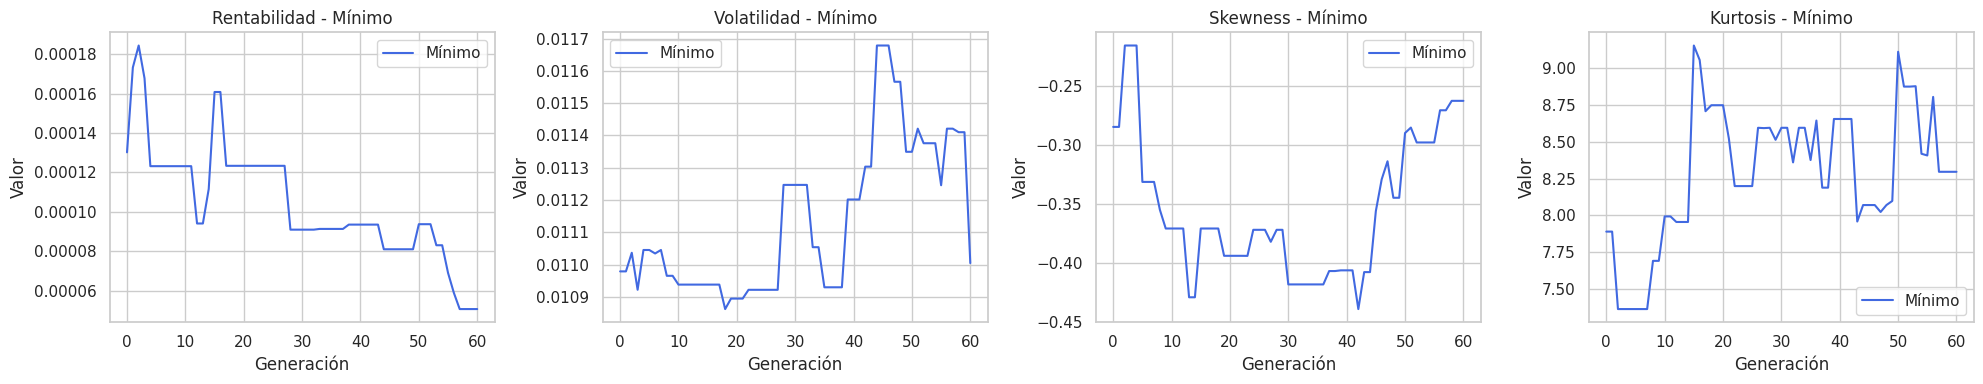

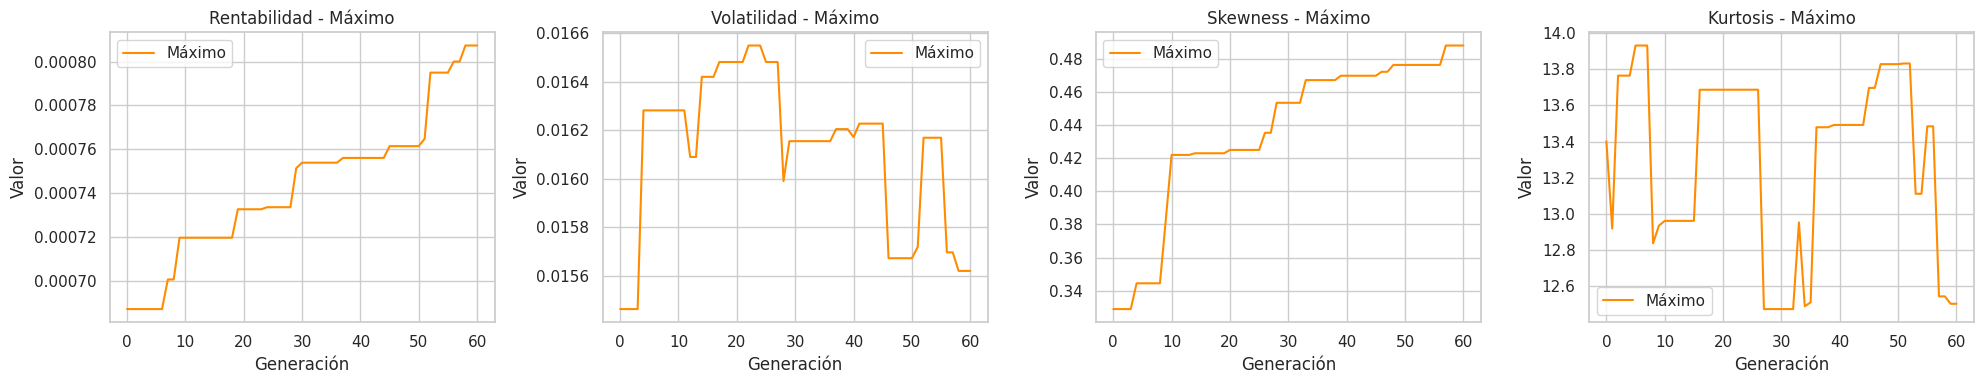

In [ ]:
nombres = ['Rentabilidad', 'Volatilidad', 'Skewness', 'Kurtosis']
graficar_objetivos_por_generacion(logbook, nombres)


**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness 1:", hof[0].fitness.values)
print("Mejor individuo 1:", hof[0])

print("Mejor fitness 2:", hof[1].fitness.values)
print("Mejor individuo 2:", hof[1])

print("Mejor fitness 3:", hof[2].fitness.values)
print("Mejor individuo 3:", hof[2])


Mejor fitness 1: (np.float64(0.0008073194260966366), np.float64(0.011592069236009533), np.float64(-0.262391420652713), np.float64(10.692100647365576))
Mejor individuo 1: [99.0, 34, 59.0, 43.0, 29, 15, 44.0, 63, 8.0, 39, 97, 8, 64.0, 5.0, 86, 57, 28.0, 81.0, 8.0, 39, 25.0, 52, 6.0, 42.0, 51, 81.0, 51.00000000000001, 74.0, 52, 45, 95.0, 29.0, 32.0]
Mejor fitness 2: (np.float64(0.0008000137206994667), np.float64(0.01154882505018705), np.float64(-0.27041083394049154), np.float64(11.039003055967132))
Mejor individuo 2: [99.0, 34, 59.0, 43.0, 29, 15, 44.0, 63, 8.0, 39, 97, 22, 64.0, 5.0, 86, 57, 28.0, 81.0, 8.0, 39, 25.0, 52, 6.0, 42.0, 91, 81.0, 51.00000000000001, 74.0, 52, 45, 95.0, 29.0, 32.0]
Mejor fitness 3: (np.float64(0.0007949801660391284), np.float64(0.011895892995541358), np.float64(-0.29777449065702455), np.float64(10.564287804078342))
Mejor individuo 3: [99.0, 34, 59.0, 43.0, 29, 78.0, 44.0, 63, 8.0, 39, 97, 22, 64.0, 5.0, 86, 57, 28.0, 81.0, 8.0, 39, 25.0, 52, 6.0, 42.0, 91, 81.

**Visualización del peso y activo correspondiente**

En esta sección se presenta la distribución final de los pesos asignados a cada activo por el algoritmo genético, una vez concluido el proceso de optimización. Junto al peso óptimo, se muestra también información complementaria como la rentabilidad esperada y la varianza (como medida de riesgo) de cada activo, evaluadas en la etapa de entrenamiento (train).

Esta visualización permite interpretar de forma directa qué activos han sido seleccionados en mayor proporción dentro de la cartera óptima y cuáles han sido descartados (peso cero), ofreciendo así una perspectiva práctica sobre el resultado final del modelo. Además, el contraste entre el rendimiento esperado y el riesgo asociado a cada activo facilita el análisis de la lógica seguida por el algoritmo al momento de construir la solución óptima.

In [ ]:
pesos = funcion_pesos(hof[0])


# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Pesos': pesos,
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Pesos': "{:.3f}",
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Algoritmo Genético pesos optimos")

# Mostrar
tabla_momentos_bonita

,Rentabilidad Esperada (Media)max,Varianza min,Pesos
Acciona,0.000947,0.000364,0.093
Acerinox,0.000175,0.000395,0.000
ACS,0.000152,0.000518,0.056
Aena,0.000052,0.000391,0.000
Amadeus IT Group,0.000282,0.000484,0.000
ArcelorMittal,0.000496,0.000853,0.000
Banco Sabadell,-0.000085,0.000921,0.000
Bankinter,0.000435,0.000466,0.059
BBVA,0.000017,0.000537,0.000
CaixaBank,0.000187,0.000503,0.000


**Métricas en Train de riesgo y rendimiento global**

En esta sección se presentan los valores resultantes de la función objetivo aplicada al mejor individuo obtenido tras el entrenamiento del algoritmo genético. Esta función integra simultáneamente el rendimiento esperado y el riesgo asociado a la cartera, permitiendo evaluar la calidad global de la solución desde una perspectiva multicriterio.

Se muestra específicamente el valor de optimización alcanzado, así como los componentes clave que la conforman: la rentabilidad final de la cartera y su nivel de riesgo (medido como varianza o desviación estándar). Estas métricas permiten validar si el algoritmo ha logrado una combinación eficiente entre ambos objetivos, de acuerdo con los criterios definidos durante la fase de diseño del modelo.

In [ ]:
opt, retorno, riesgo = funcion_resultado_global(hof[0])

print(f"La optimización final es maxima: {opt}")
print(f"El retorno final es maxima: {retorno}")
print(f"El riesgo final es mínimo: {riesgo}")

La optimización final es maxima: 0.13928823399169918
El retorno final es maxima: 0.0008073194260966366
El riesgo final es mínimo: 0.0057960346180047665


**Evaluación de la cartera sobre datos de test**

Tras el entrenamiento y validación de la cartera óptima, se procede a evaluar su comportamiento sobre un conjunto de datos no vistos previamente, correspondiente al periodo 2022–2025. Esta evaluación permite analizar la capacidad generalizadora del modelo y verificar si la solución obtenida mantiene un equilibrio adecuado entre rentabilidad y riesgo fuera del entorno de entrenamiento.

Se presentan diferentes métricas relevantes para este análisis, entre ellas la rentabilidad media diaria, la volatilidad y la semivarianza, así como medidas de riesgo extremo como el CVaR al 5 % y el máximo drawdown observado. Además, se calcula la rentabilidad acumulada a lo largo del periodo test, como indicativo global del rendimiento real de la cartera.

Estas métricas proporcionan una visión integral del comportamiento de la solución optimizada en condiciones reales, y permiten comparar su desempeño frente a otras estrategias o benchmarks de referencia.

- R**entabilidad Media Diaria:** Representa el promedio del rendimiento generado por la cartera cada día durante el periodo de test. Esta métrica es clave porque permite conocer si la cartera tiene una tendencia general positiva o negativa en su desempeño diario. Una rentabilidad media positiva sugiere que, en promedio, la inversión está creciendo día a día, lo cual es fundamental para evaluar la viabilidad del modelo.

- **Volatilidad Diaria:** Mide la variabilidad de los retornos diarios respecto a su media, es decir, cuánto fluctúan los rendimientos de la cartera en el corto plazo. Su importancia radica en que refleja el nivel de incertidumbre o riesgo total asociado a la estrategia: una alta volatilidad implica mayor exposición a cambios bruscos, lo que puede resultar menos atractivo para inversores con aversión al riesgo.

- **Semivarianza Diaria:** Calcula la varianza de los retornos solo en los días en los que la cartera experimenta pérdidas. Esta métrica es especialmente relevante porque permite medir el riesgo centrado únicamente en los escenarios desfavorables, lo cual resulta más representativo para muchos perfiles de inversor que priorizan la protección ante caídas frente a la simple variabilidad general.

- **Rentabilidad Acumulada:** Indica el crecimiento total del capital invertido a lo largo del periodo de evaluación, considerando el efecto compuesto de los retornos diarios. Es una métrica fundamental para conocer el resultado neto de la estrategia, ya que resume de manera clara si la cartera ha generado ganancias o pérdidas totales al final del periodo de test.

- **Drawdown:** Refleja la mayor caída sufrida por la cartera desde un pico hasta un mínimo posterior, dentro del periodo evaluado. Esta métrica es importante porque ayuda a identificar el peor escenario de pérdida temporal que pudo haber vivido un inversor, siendo un indicador clave de la estabilidad y resiliencia de la estrategia frente a crisis o momentos de alta volatilidad.

- **CVaR 5% Diario (Conditional Value at Risk):** Estima la pérdida media esperada en el 5 % de los peores días de rentabilidad. Su relevancia radica en que proporciona una visión más realista del riesgo extremo, al cuantificar no solo la probabilidad de una pérdida severa, sino también su magnitud promedio, lo que lo convierte en un indicador esencial para evaluar la exposición a eventos adversos poco frecuentes pero de gran impacto.

In [ ]:
resultados2 = resultados_test(returns_data_25, pesos, 1)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00038,0.00973,0.00005008,1.07178,-0.11764,-0.02271


## **Algoritmo Genético con restricciones ESG**

En esta variante del modelo, se ha incorporado una penalización inversa como mecanismo para favorecer la inversión en compañías con alto desempeño en sostenibilidad. Concretamente, se ha utilizado el listado Top 5 del índice IBEX ESG como referencia para identificar aquellas empresas que recibirán un tratamiento prioritario durante el proceso de optimización.

Esta ventaja ESG se ha implementado directamente dentro de la función objetivo, que en este caso es de minimización (por ejemplo, minimización del riesgo o de una combinación de métricas como la varianza o el CVaR). Para los individuos que asignan una parte de su peso a empresas del Top 5 ESG, se aplica una pequeña resta al valor final del fitness, lo que mejora su evaluación relativa frente al resto de la población.

El ajuste es lo suficientemente sutil como para no distorsionar el comportamiento global del algoritmo, pero suficiente para introducir una preferencia suave por soluciones sostenibles, favoreciendo aquellas carteras que incorporan de forma significativa activos con buen desempeño en criterios ambientales, sociales y de gobernanza.

Este enfoque permite analizar cómo la introducción de una señal de sostenibilidad influye en la configuración final de las carteras y si se mantiene un equilibrio eficiente entre riesgo y rentabilidad, sin necesidad de excluir explícitamente a otros activos.


In [ ]:
empresas_esg = ['Santander', 'Iberdrola', 'Inditex', 'BBVA', 'CaixaBank']

In [ ]:
company_names = matriz_close.columns.tolist()

company_names

['Acciona',
 'Acerinox',
 'ACS',
 'Aena',
 'Amadeus IT Group',
 'ArcelorMittal',
 'Banco Sabadell',
 'Bankinter',
 'BBVA',
 'CaixaBank',
 'Cellnex Telecom',
 'Enagás',
 'Endesa',
 'Ferrovial',
 'Fluidra',
 'Grifols',
 'IAG (International Airlines Group)',
 'Iberdrola',
 'Inditex',
 'Indra Sistemas',
 'Inmobiliaria Colonial',
 'Logista',
 'Mapfre',
 'Merlin Properties',
 'Naturgy',
 'Redeia (antigua Red Eléctrica)',
 'Repsol',
 'Laboratorios Rovi',
 'Sacyr',
 'Santander',
 'Solaria Energía',
 'Telefónica',
 'Unicaja Banco']

In [ ]:
len(company_names)

33

In [ ]:
# Límite de peso de una acción
limite_apuesta = 0.5

# Límite de distintas empresas
max_num_empresas = 15

# Total de acciones de la cartera
n = mean_returns.shape[0]

# Datos del rango escogido [a,b]
a = 0
b = 100

# Ventaja de las empresa ESG
esg = 0.02

### Función objetivo y función de interpretación - ESG

In [ ]:
def calcular_rendimiento_con_esg(pesos, empresas_esg, company_names):
    esg_beneficio = 0
    for i, peso in enumerate(pesos):
        if peso != 0 and company_names[i] in empresas_esg:
            esg_beneficio += esg  # Suma el peso y la bonificación ESG
        elif peso !=0:
          esg_beneficio += 0

    return esg_beneficio

In [ ]:
# Restricciones
# 1. Función para limitar máximo empresas
def limitar_empresas(ind):
    ind = np.array(ind)
    if np.sum(ind > 1) > max_num_empresas:
        indices_menores = np.argsort(ind)[:-max_num_empresas]
        ind[indices_menores] = 0
    ind = np.clip(ind, 0, 100)  # asegurar valores entre 0 y 1
    return ind

# 2. Limitar número de apuesta
def limitar_apuesta_maxima(ind):
    limite_apuesta = 0.5
    ind = np.array(ind)
    aux = np.clip(ind, 0, limite_apuesta)  # Limita cada valor máximo a 'limite_apuesta'
    if (aux != ind).any():
        return 1
    else:
      return 0

# 3. Solo 4 decimales de pesos
def adjust_weights(weights):
    weights = np.array(weights, dtype=float)
    weights /= np.sum(weights)  # normaliza antes por si acaso

    # Redondeamos a 4 decimales, pero sin perder el original
    rounded_weights = np.round(weights, 4)
    diff = 1 - np.sum(rounded_weights)

    # Añadimos la diferencia al valor más grande (estable)
    if abs(diff) > 1e-6:
        idx = np.argmax(rounded_weights)
        rounded_weights[idx] += diff

    return rounded_weights

# Ojito: función de interpretación
def funcion_pesos(individuo):
    individuo = limitar_empresas(individuo)

    weights = np.array(individuo, dtype=float)
    weights /= np.sum(weights) # para que la suma sea el 100% ni más, ni menos, teneindo en cuenta el peso de cada individuo

    weights = adjust_weights(weights)

    return weights # se puede ver como la resta

In [ ]:
def funcion_objetivo(individuo):

    for i in range(len(individuo)):
      if individuo[i] > b or individuo[i] < a:
          return 90,

    weights = funcion_pesos(individuo)
    penalti = limitar_apuesta_maxima(weights)

    mean_return = np.dot(mean_returns, weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    skew_portfolio = np.dot(skewness, weights)
    kurt_portfolio = np.dot(kurt, weights)

    if volatility == 0 or penalti:
        return 9999, # si se minimiza se pone una burrada de grande

    # Parámetros para ajustar la importancia de cada término
    alpha = 0.6  # peso de la rentabilidad
    # un nº menor implica mneos adversión al riesgo
    beta = 0.3   # peso de la volatilidad --> perfil del inversor 4 tipos
    gamma = 0.2  # peso de la asimetría (premiamos sesgo positivo)
    delta = 0.1  # peso de la curtosis (penalizamos curtosis alta)

    rendimiento_esg = calcular_rendimiento_con_esg(weights, empresas_esg, company_names)

    # Función objetivo final: suma ponderada
    objetivo = (alpha * mean_return) - (beta * volatility) + (gamma * skew_portfolio) - (delta * kurt_portfolio) + rendimiento_esg

    return -objetivo,  # Se pone signo menos para así minimizar

### Creación AGS con FO compleja

Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# 1. Definir una función que genere números enteros entre 'a' y 'b'
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)

toolbox.register("attr_uniform", random.randint, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre 0 y el límite seleccionado distinto cada vez

toolbox.attr_uniform()

76

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, n)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio

individuo = toolbox.individual()
#individuo

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado

individuo.fitness.values

()

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, n*10*2)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 660 filas (una por cada individuo)

poblacion = toolbox.population()
#print(poblacion)

In [ ]:
# Cada individuo tiene 33 componentes = acciones

print(poblacion[0])

[44, 83, 53, 83, 19, 93, 12, 3, 43, 78, 53, 16, 20, 2, 19, 17, 15, 27, 40, 76, 44, 91, 14, 74, 7, 54, 63, 65, 5, 56, 40, 26, 55]


In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.

poblacion[0].fitness.values

()

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)

toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1

funcion_objetivo(individuo)

(np.float64(0.947180860053867),)

In [ ]:
# Ejemplo de uso 2 --> vemos que da lo mismo

toolbox.evaluate(individuo)

(np.float64(0.947180860053867),)

**Reproducción y selección**

- Cruce Blend
- Mutación Uniforme de Enteros
- Selección por torneo

In [ ]:
# Registrar la operación gnética de cruce por un punto
# Los individuos podrán estar formados por acciones que sean números eneteros o decimales, no afecta
# Siempre que esté en nuestra mano se pondrá enteros como en el caso de los indiviuos y posblación incial, y depsués en la mutación.
# toolbox.register(función, función tipo de cruce)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# a --> limite inferior
# b --> limite superior
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.15)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=0.05)


In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
1.  *Probabilidad de Cruce:* Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.
2.  *Probabilidad de Mutación:* Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.
3.  *Número de generaciones:* Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares

CXPB, MUTPB, NGEN = 0.7,0.9,60

In [ ]:
#Generamos la Población Inicial

pop = toolbox.population()
print(pop)

[[49, 70, 85, 76, 89, 39, 67, 74, 77, 82, 93, 91, 85, 53, 22, 87, 24, 31, 76, 64, 28, 14, 0, 82, 21, 100, 29, 93, 21, 42, 30, 14, 2], [55, 90, 22, 70, 79, 19, 39, 28, 89, 16, 13, 30, 78, 45, 40, 57, 83, 37, 90, 26, 76, 80, 16, 88, 7, 80, 90, 43, 77, 1, 50, 92, 90], [62, 7, 46, 73, 92, 62, 71, 26, 9, 80, 29, 3, 62, 17, 81, 16, 66, 16, 77, 48, 58, 59, 84, 8, 25, 25, 42, 89, 34, 59, 24, 79, 89], [5, 65, 50, 1, 28, 67, 24, 19, 97, 32, 49, 53, 72, 77, 7, 81, 62, 67, 5, 84, 97, 54, 55, 37, 89, 73, 29, 43, 84, 5, 43, 80, 1], [27, 78, 30, 68, 3, 72, 51, 93, 12, 75, 63, 60, 36, 50, 15, 39, 8, 83, 57, 92, 43, 88, 89, 79, 98, 98, 12, 44, 5, 59, 40, 52, 89], [45, 33, 35, 21, 92, 33, 23, 99, 48, 15, 87, 11, 75, 40, 30, 7, 57, 31, 12, 1, 92, 7, 98, 29, 88, 34, 41, 27, 100, 54, 46, 18, 83], [7, 12, 31, 88, 36, 65, 7, 85, 100, 80, 18, 55, 38, 23, 17, 82, 4, 24, 91, 35, 50, 51, 33, 65, 0, 24, 64, 31, 63, 8, 15, 59, 75], [13, 55, 62, 48, 96, 65, 65, 44, 22, 75, 85, 14, 95, 71, 59, 83, 37, 11, 17, 46, 80

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

In [ ]:
# Se confirma que hof está en el momento vacío

print(hof)

[]


In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO

stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.

stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [ ]:
# loogbook contendrá todo el registro de evolución

logbook = tools.Logbook()

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg    	std     	min     	max    
0  	660   	1.04971	0.113499	0.746175	1.39128
1  	631   	57.2184	42.9433 	0.772345	90     
2  	640   	69.2204	37.6663 	0.768223	90     
3  	638   	70.2992	36.9649 	0.716636	90     
4  	645   	76.2359	32.1932 	0.673943	90     
5  	634   	74.4817	33.7827 	0.704925	90     
6  	638   	75.8284	32.5816 	0.711584	90     
7  	638   	75.6926	32.7087 	0.725376	90     
8  	639   	76.5044	31.9364 	0.746659	90     
9  	646   	78.3937	29.9848 	0.699142	90     
10 	637   	79.7427	28.4336 	0.699142	90     
11 	634   	77.1795	31.2656 	0.699142	90     
12 	644   	77.3171	31.1217 	0.74885 	90     
13 	644   	77.7217	30.7024 	0.701148	90     
14 	642   	76.6414	31.7999 	0.733297	90     
15 	639   	76.6416	31.7995 	0.721246	90     
16 	642   	76.2342	32.1972 	0.697875	90     
17 	639   	75.8281	32.5823 	0.680776	90     
18 	637   	74.4757	33.7957 	0.656572	90     
19 	643   	72.451 	35.434  	0.656572	90     
20 	636   	72.7234	35.2217 	0.694861	90     
21 	642   

### Resultados del AG Simple de FO compleja

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

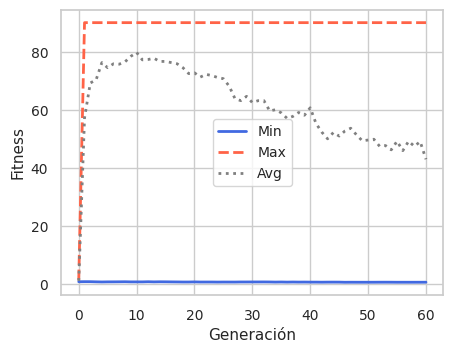

In [ ]:
plot_evolucion([logbook])

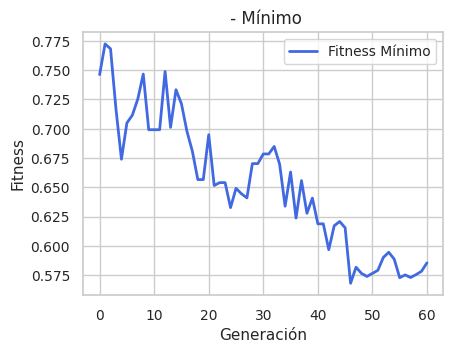

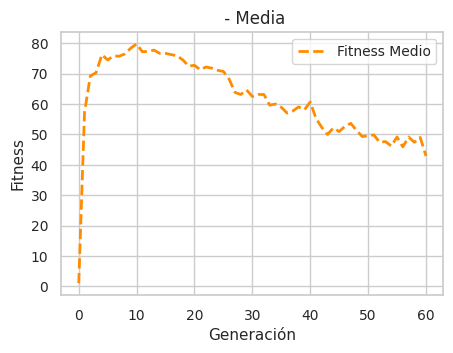

In [ ]:
plot_evolucion_doble([logbook])

**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: 0.568053
Mejor individuo [10.925439446224692, 61.75116403002282, 36.83196957637367, 43, 56.098054124061534, 78.66000321132253, 62.652978797857706, 51.17091855474719, 49.25240616394805, 69.09418632462277, 60.83884433257753, 48.78033011069891, 41.20170374232212, 45.19671332100194, 25.933417592341428, 49.04121018576321, 62.920583264437774, 45.71424625043839, 58.47958090240806, 53.14680138968143, 40.6881731856044, 46.14405876067448, 34, 41.27548569801825, 13.104104249060525, 43.111371124515735, 5.788111449154262, 92.2137972984919, 10.056586946941641, 61.80948368326854, 68.82203755006225, 26.15531033450757, 44.13870192154661]
Mejor fitness 2: 0.572839
Mejor individuo 2: [44.39931319416581, 68.93153134668341, 39.413760680757996, 26.046728632205234, 51.576427337781, 98.91992343400393, 73.5000138493108, 43.9638636735542, 69.38187085272484, 55.27874973700433, 56.94089001476232, 48.64232309807173, 16.752317502585385, 41.77485842186646, 56.51142085432935, 74.48758843040028, 23.2660

**Visualización del peso y activo correspondiente**

En esta sección se presenta la distribución final de los pesos asignados a cada activo por el algoritmo genético, una vez concluido el proceso de optimización. Junto al peso óptimo, se muestra también información complementaria como la rentabilidad esperada y la varianza (como medida de riesgo) de cada activo, evaluadas en la etapa de entrenamiento (train).

Esta visualización permite interpretar de forma directa qué activos han sido seleccionados en mayor proporción dentro de la cartera óptima y cuáles han sido descartados (peso cero), ofreciendo así una perspectiva práctica sobre el resultado final del modelo. Además, el contraste entre el rendimiento esperado y el riesgo asociado a cada activo facilita el análisis de la lógica seguida por el algoritmo al momento de construir la solución óptima.

In [ ]:
pesos = funcion_pesos(hof[0])


# Ahora combinamos todo en un DataFrame
tabla_momentos = pd.DataFrame({
    'Rentabilidad Esperada (Media)max': mean_returns,
    'Varianza min': np.diag(cov_matrix),  # Solo la varianza de cada activo (diagonal de la matriz)
    'Pesos': pesos,
})

# Formatear la tabla
tabla_momentos_bonita = tabla_momentos.style.format({
    'Rentabilidad Esperada': "{:.5f}",
    'Varianza': "{:.5f}",
    'Pesos': "{:.3f}",
}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_properties(**{
    'text-align': 'center'
}).set_caption("Algoritmo Genético pesos optimos")

# Mostrar
tabla_momentos_bonita

,Rentabilidad Esperada (Media)max,Varianza min,Pesos
Acciona,0.000947,0.000364,0.000
Acerinox,0.000175,0.000395,0.066
ACS,0.000152,0.000518,0.000
Aena,0.000052,0.000391,0.000
Amadeus IT Group,0.000282,0.000484,0.060
ArcelorMittal,0.000496,0.000853,0.084
Banco Sabadell,-0.000085,0.000921,0.067
Bankinter,0.000435,0.000466,0.055
BBVA,0.000017,0.000537,0.053
CaixaBank,0.000187,0.000503,0.074


**Métricas en Train de riesgo y rendimiento global**

En esta sección se presentan los valores resultantes de la función objetivo aplicada al mejor individuo obtenido tras el entrenamiento del algoritmo genético. Esta función integra simultáneamente el rendimiento esperado y el riesgo asociado a la cartera, permitiendo evaluar la calidad global de la solución desde una perspectiva multicriterio.

Se muestra específicamente el valor de optimización alcanzado, así como los componentes clave que la conforman: la rentabilidad final de la cartera y su nivel de riesgo (medido como varianza o desviación estándar). Estas métricas permiten validar si el algoritmo ha logrado una combinación eficiente entre ambos objetivos, de acuerdo con los criterios definidos durante la fase de diseño del modelo.

In [ ]:
opt, retorno, riesgo = funcion_resultado_global(hof[0])

print(f"La optimización final es maxima: {opt}")
print(f"El retorno final es maxima: {retorno}")
print(f"El riesgo final es mínimo: {riesgo}")

La optimización final es maxima: 0.05827855280667875
El retorno final es maxima: 0.0004420396549956306
El riesgo final es mínimo: 0.007584945639641427


**Evaluación de la cartera sobre datos de test**

Tras el entrenamiento y validación de la cartera óptima, se procede a evaluar su comportamiento sobre un conjunto de datos no vistos previamente, correspondiente al periodo 2022–2025. Esta evaluación permite analizar la capacidad generalizadora del modelo y verificar si la solución obtenida mantiene un equilibrio adecuado entre rentabilidad y riesgo fuera del entorno de entrenamiento.

Se presentan diferentes métricas relevantes para este análisis, entre ellas la rentabilidad media diaria, la volatilidad y la semivarianza, así como medidas de riesgo extremo como el CVaR al 5 % y el máximo drawdown observado. Además, se calcula la rentabilidad acumulada a lo largo del periodo test, como indicativo global del rendimiento real de la cartera.

Estas métricas proporcionan una visión integral del comportamiento de la solución optimizada en condiciones reales, y permiten comparar su desempeño frente a otras estrategias o benchmarks de referencia.

- R**entabilidad Media Diaria:** Representa el promedio del rendimiento generado por la cartera cada día durante el periodo de test. Esta métrica es clave porque permite conocer si la cartera tiene una tendencia general positiva o negativa en su desempeño diario. Una rentabilidad media positiva sugiere que, en promedio, la inversión está creciendo día a día, lo cual es fundamental para evaluar la viabilidad del modelo.

- **Volatilidad Diaria:** Mide la variabilidad de los retornos diarios respecto a su media, es decir, cuánto fluctúan los rendimientos de la cartera en el corto plazo. Su importancia radica en que refleja el nivel de incertidumbre o riesgo total asociado a la estrategia: una alta volatilidad implica mayor exposición a cambios bruscos, lo que puede resultar menos atractivo para inversores con aversión al riesgo.

- **Semivarianza Diaria:** Calcula la varianza de los retornos solo en los días en los que la cartera experimenta pérdidas. Esta métrica es especialmente relevante porque permite medir el riesgo centrado únicamente en los escenarios desfavorables, lo cual resulta más representativo para muchos perfiles de inversor que priorizan la protección ante caídas frente a la simple variabilidad general.

- **Rentabilidad Acumulada:** Indica el crecimiento total del capital invertido a lo largo del periodo de evaluación, considerando el efecto compuesto de los retornos diarios. Es una métrica fundamental para conocer el resultado neto de la estrategia, ya que resume de manera clara si la cartera ha generado ganancias o pérdidas totales al final del periodo de test.

- **Drawdown:** Refleja la mayor caída sufrida por la cartera desde un pico hasta un mínimo posterior, dentro del periodo evaluado. Esta métrica es importante porque ayuda a identificar el peor escenario de pérdida temporal que pudo haber vivido un inversor, siendo un indicador clave de la estabilidad y resiliencia de la estrategia frente a crisis o momentos de alta volatilidad.

- **CVaR 5% Diario (Conditional Value at Risk):** Estima la pérdida media esperada en el 5 % de los peores días de rentabilidad. Su relevancia radica en que proporciona una visión más realista del riesgo extremo, al cuantificar no solo la probabilidad de una pérdida severa, sino también su magnitud promedio, lo que lo convierte en un indicador esencial para evaluar la exposición a eventos adversos poco frecuentes pero de gran impacto.

In [ ]:
resultados2 = resultados_test(returns_data_25, pesos, 1)

,Rentabilidad Media Diaria,Volatilidad Diaria,Semivarianza Diaria,Rentabilidad Acumulada,Drawdown,CVaR 5% Diario
0,0.00088,0.01083,0.00006049,1.21374,-0.17891,-0.02525
